#  **Análise de Assinaturas de Carga Elétrica**
### *Autor:* José Tiago Torres de Lima  
### *Universidade Federal do Ceará (UFC)*

---

##  **Descrição do Projeto**

Neste trabalho, foram coletadas amostras de assinaturas de carga elétrica utilizando um osciloscópio. O objetivo foi validar o sistema de aquisição de dados desenvolvido, comparando os sinais capturados com uma referência confiável.  

As medições feitas com o osciloscópio revelam uma **componente constante (DC offset)** presente em todas as amostras, característica importante para calibrar e ajustar o processamento dos dados.  

Este caderno organiza e apresenta o carregamento dos dados, sua limpeza, a análise no domínio do tempo e frequência, além da visualização com gráficos de alta qualidade para uma interpretação clara dos resultados.


# **Notebook - Osciloscópio**

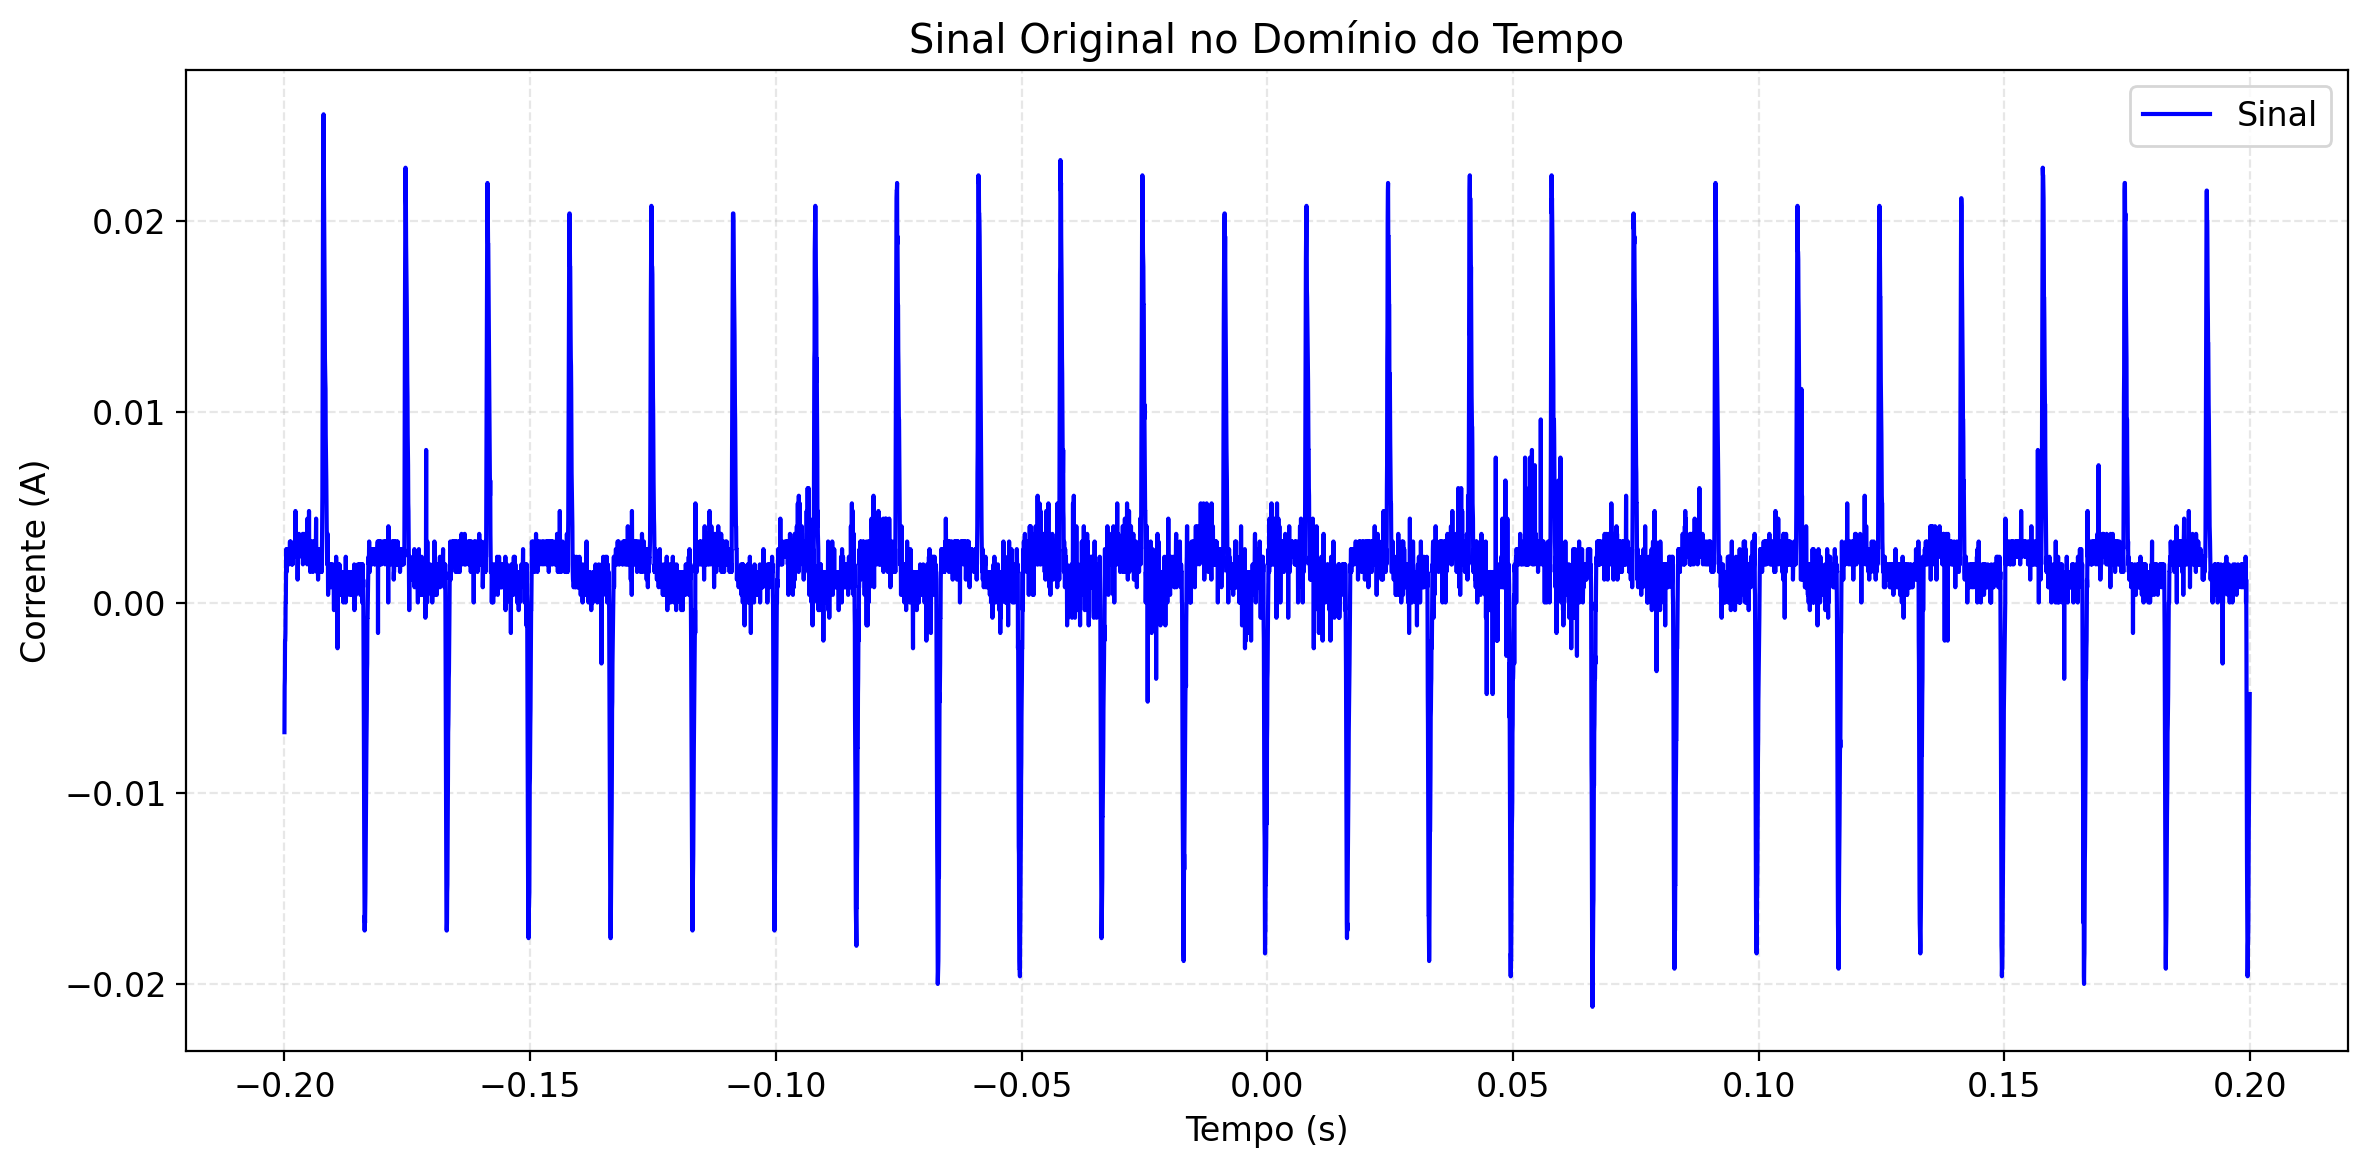

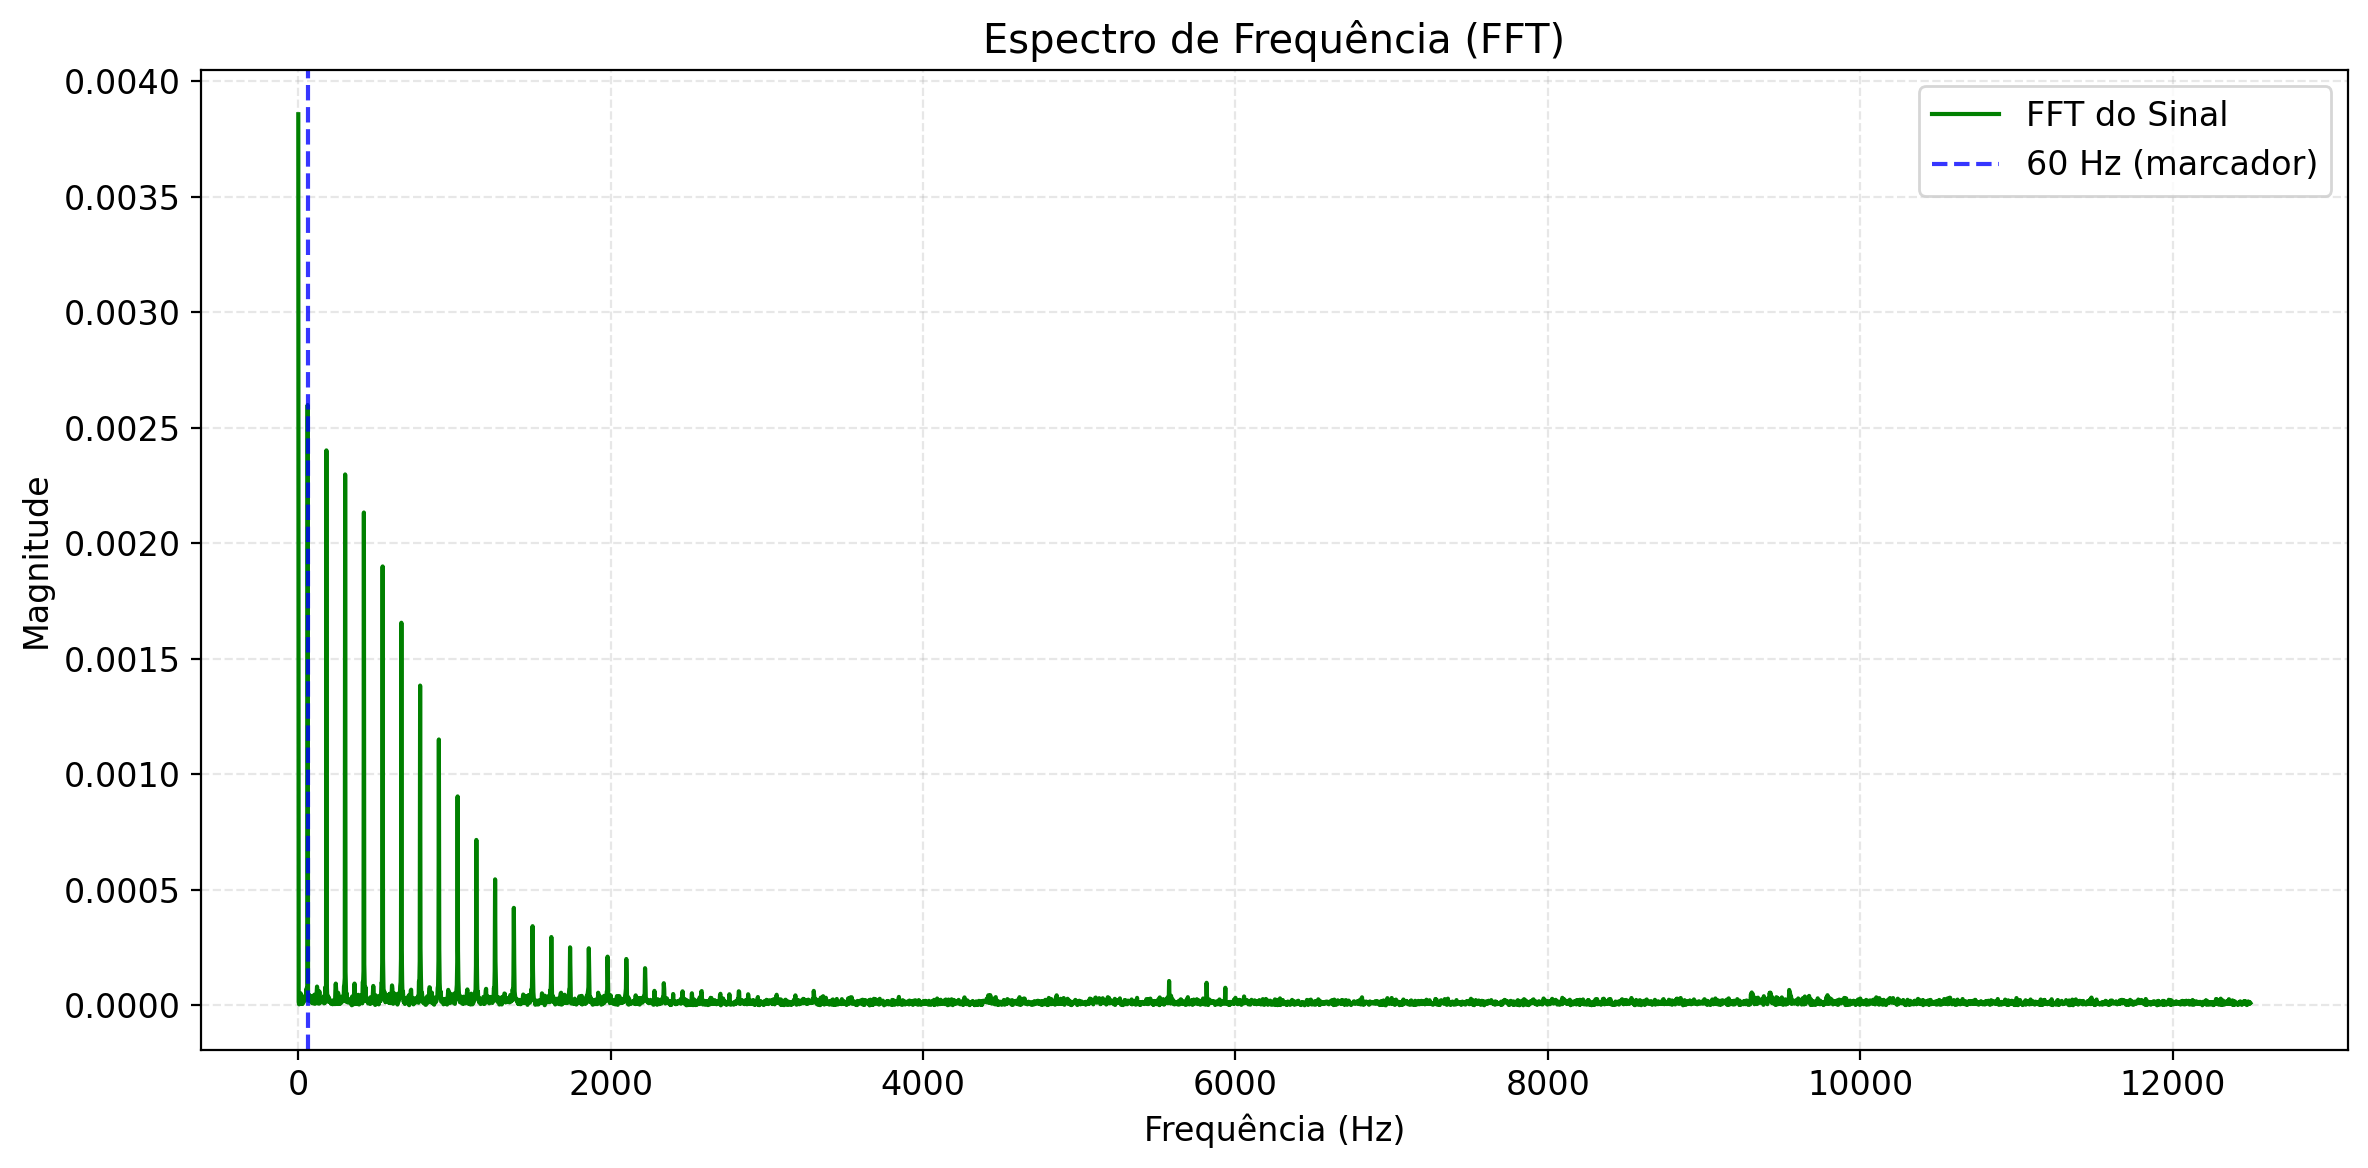

Frequência fundamental detectada: 60.00 Hz


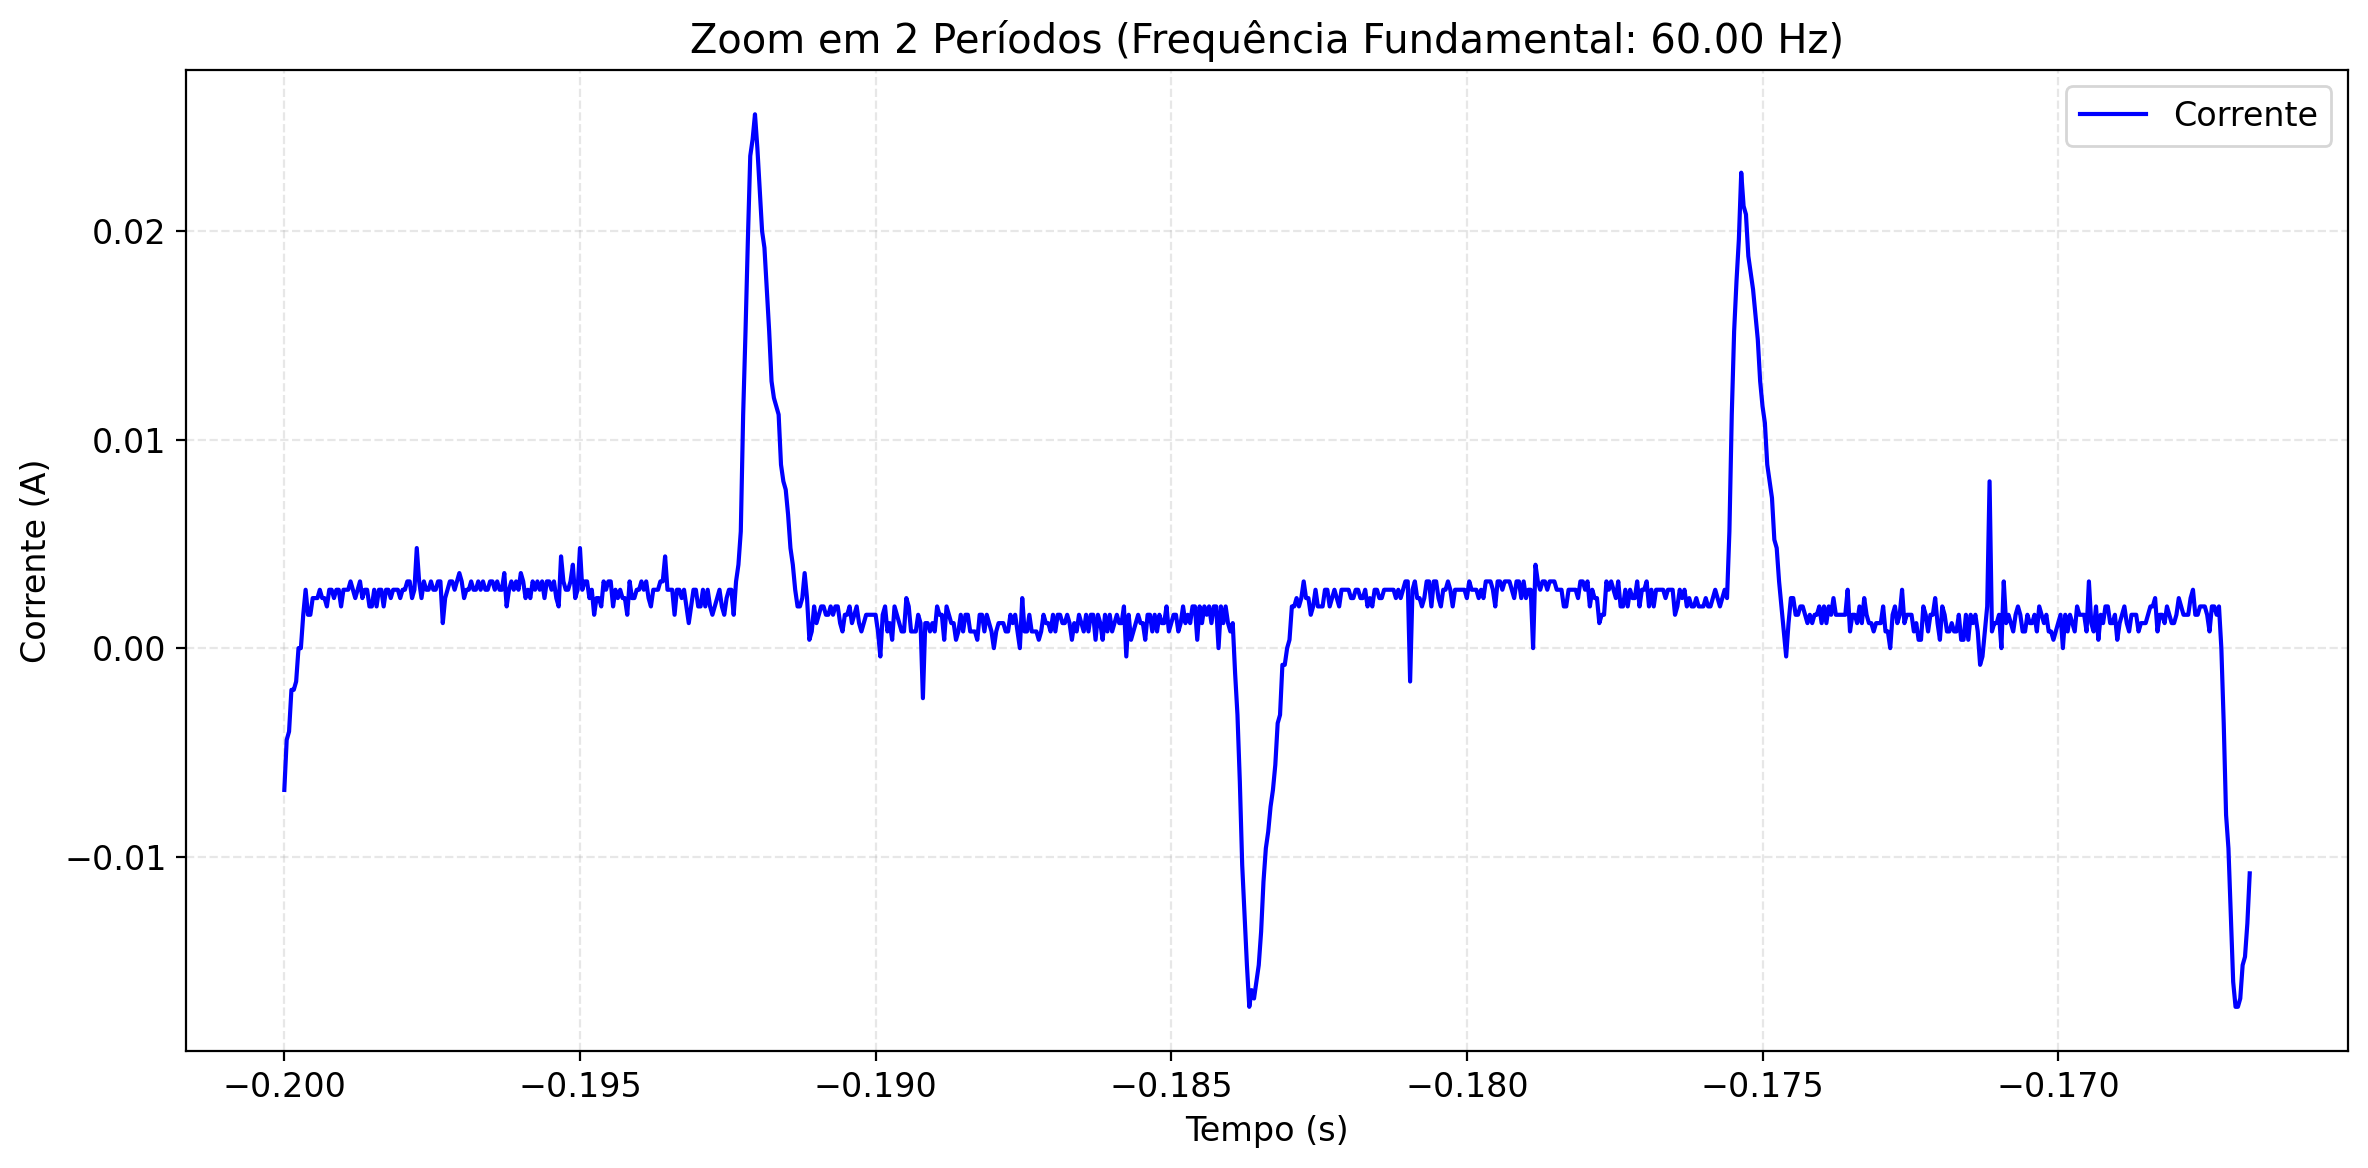

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# --- CONFIGURAÇÃO GLOBAL PARA ALTA QUALIDADE DE PLOTAGEM ---
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12

# --- 1. CARREGAMENTO E LIMPEZA DOS DADOS ---
caminho_arquivo = "/content/not.csv"
try:
    df = pd.read_csv(caminho_arquivo, delimiter=",", skiprows=1, names=["Tempo (s)", "Corrente (A)"])
except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo}' não foi encontrado.")
    exit()

df["Tempo (s)"] = pd.to_numeric(df["Tempo (s)"], errors="coerce")
df["Corrente (A)"] = pd.to_numeric(df["Corrente (A)"], errors="coerce")
df = df.dropna().sort_values(by="Tempo (s)")

# --- 2. PREPARAÇÃO PARA ANÁLISE ---
t = df["Tempo (s)"].values
y = df["Corrente (A)"].values

if len(y) < 2:
    print("Não há dados suficientes para analisar após a limpeza.")
else:
    # --- 3. CÁLCULO DOS PARÂMETROS DE AMOSTRAGEM E FFT ---
    N = len(y)
    Ts = np.mean(np.diff(t))
    fs = 1 / Ts

    yf_complex = fft(y)
    xf = fftfreq(N, Ts)

    xf_pos = xf[:N // 2]
    yf_mag = 2.0 / N * np.abs(yf_complex[:N // 2])

    # --- 4. DETECÇÃO DA FREQUÊNCIA FUNDAMENTAL ---
    if len(yf_mag) > 1:
        indice_pico = np.argmax(yf_mag[1:]) + 1
        freq_fund = xf_pos[indice_pico]
    else:
        freq_fund = 0

    # --- 5. PLOTAGEM EM FIGURAS SEPARADAS DE ALTA QUALIDADE ---

    # Gráfico 1: Sinal Original no Domínio do Tempo
    plt.figure(figsize=(12, 6), dpi=200)
    plt.plot(t, y, label="Sinal", color="blue", linewidth=1.5)
    plt.title("Sinal Original no Domínio do Tempo")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Corrente (A)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Gráfico 2: Espectro de Frequência (FFT)
    plt.figure(figsize=(12, 6), dpi=200)
    plt.plot(xf_pos, yf_mag, label="FFT do Sinal", color="green", linewidth=1.5)
    plt.axvline(x=60, color='blue', linestyle='--', alpha=0.79, label='60 Hz (marcador)')
    plt.title("Espectro de Frequência (FFT)")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Gráfico 3: Zoom em 2 Períodos
    if freq_fund > 0:
        print(f"Frequência fundamental detectada: {freq_fund:.2f} Hz")

        amostras_zoom = int(round(2 * fs / freq_fund))
        if amostras_zoom > N:
            amostras_zoom = N

        plt.figure(figsize=(12, 6), dpi=200)
        plt.plot(t[:amostras_zoom], y[:amostras_zoom], label="Corrente", color="blue", linewidth=1.5)
        plt.title(f"Zoom em 2 Períodos (Frequência Fundamental: {freq_fund:.2f} Hz)")
        plt.xlabel("Tempo (s)")
        plt.ylabel("Corrente (A)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("Não foi possível detectar uma frequência fundamental válida para o zoom.")
        plt.figure(figsize=(12, 3), dpi=200)
        plt.text(0.5, 0.5, 'Zoom não aplicável (frequência fundamental não detectada)',
                 ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)
        plt.axis('off')
        plt.tight_layout()
        plt.show()


# **Notebook - Sistema Proposto**

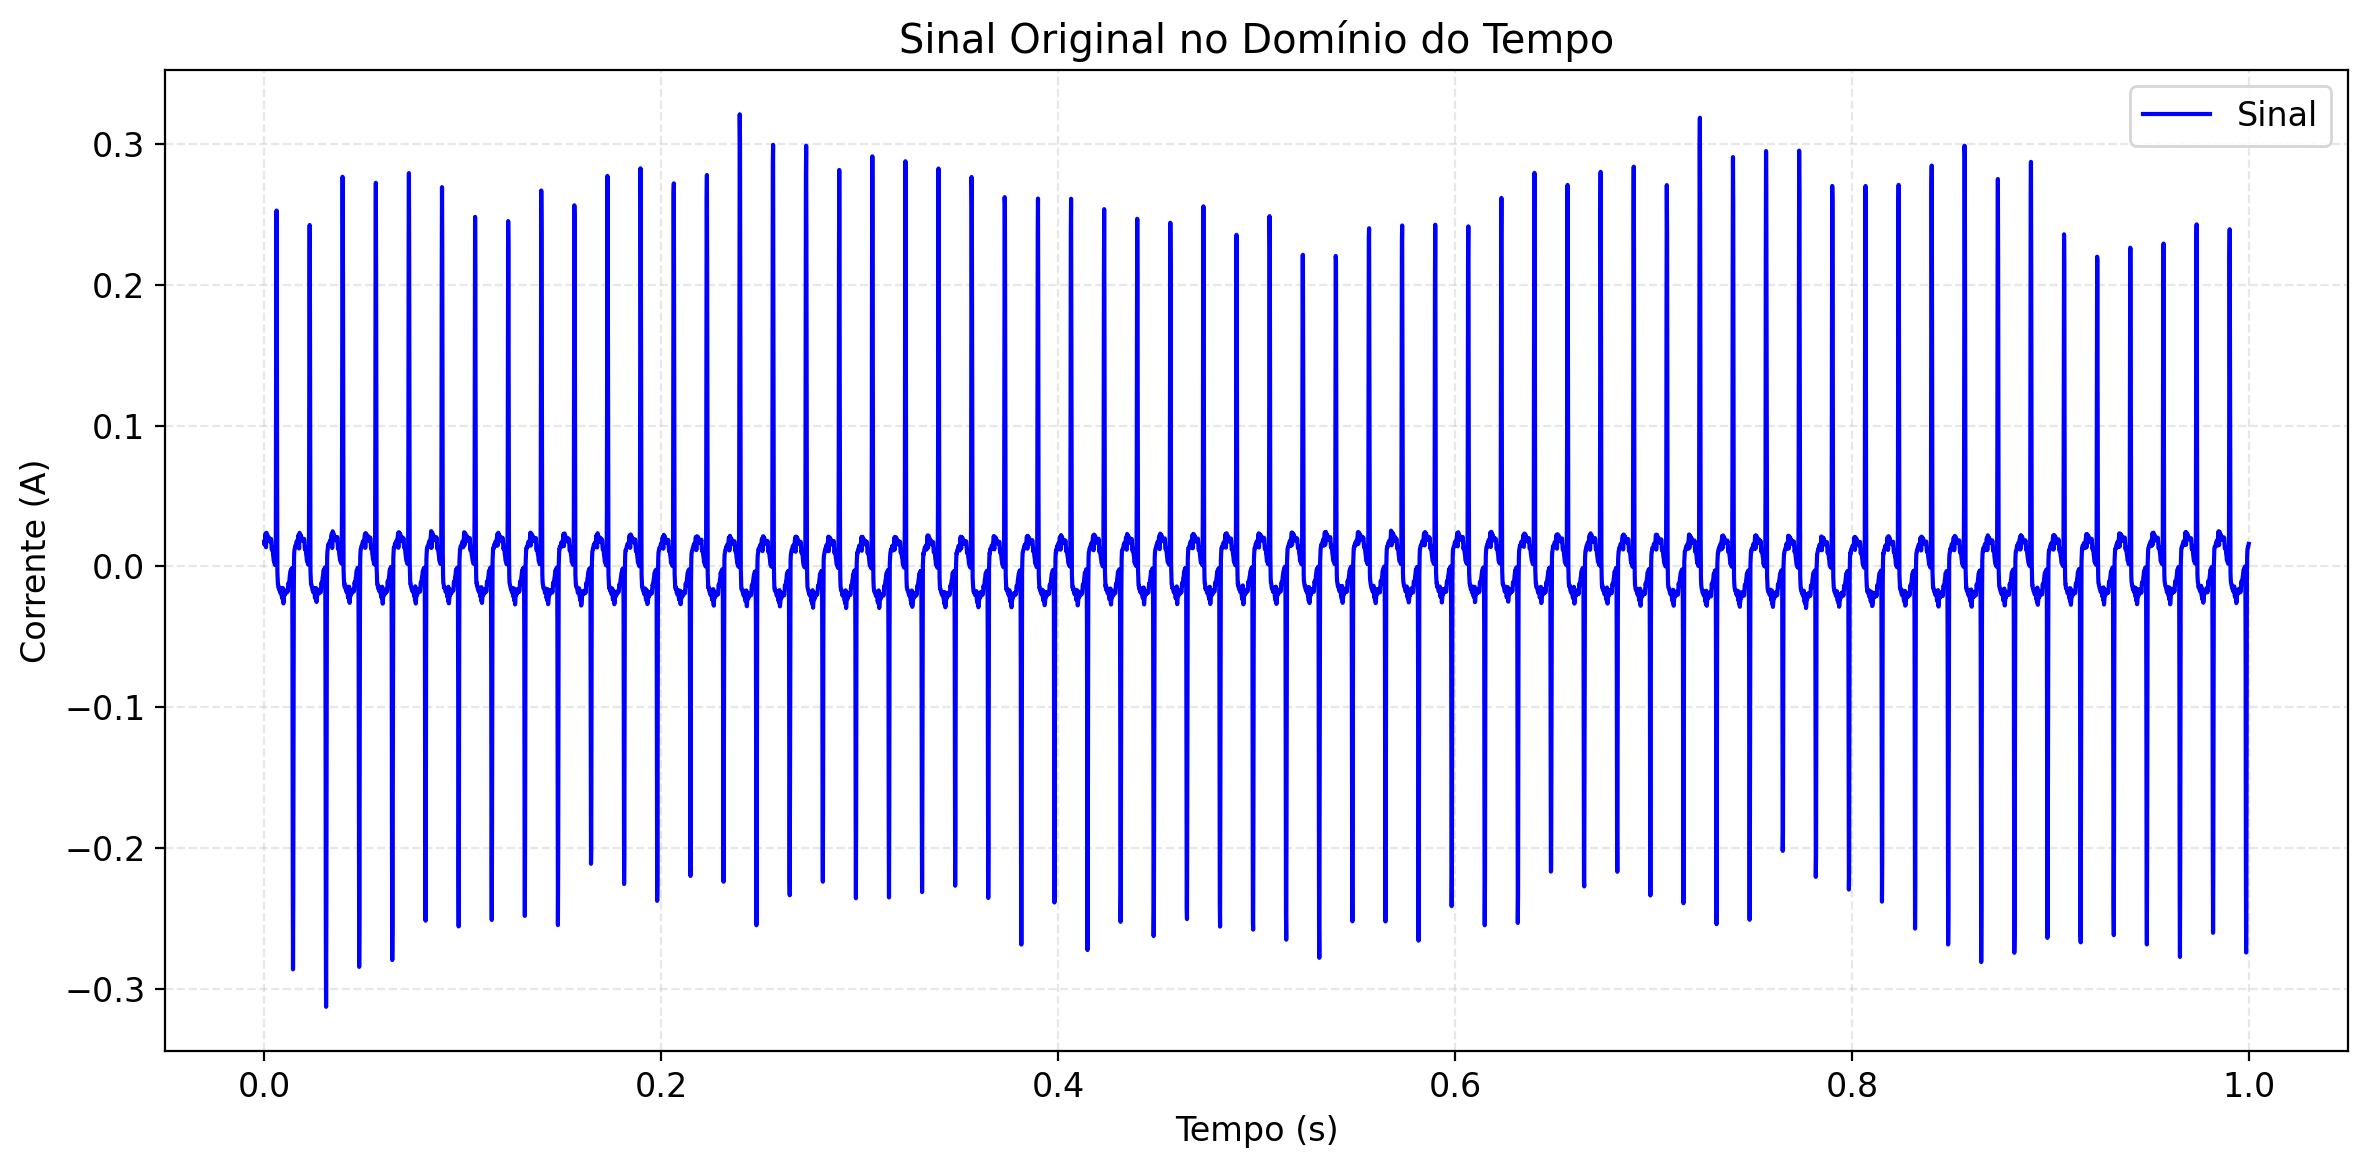

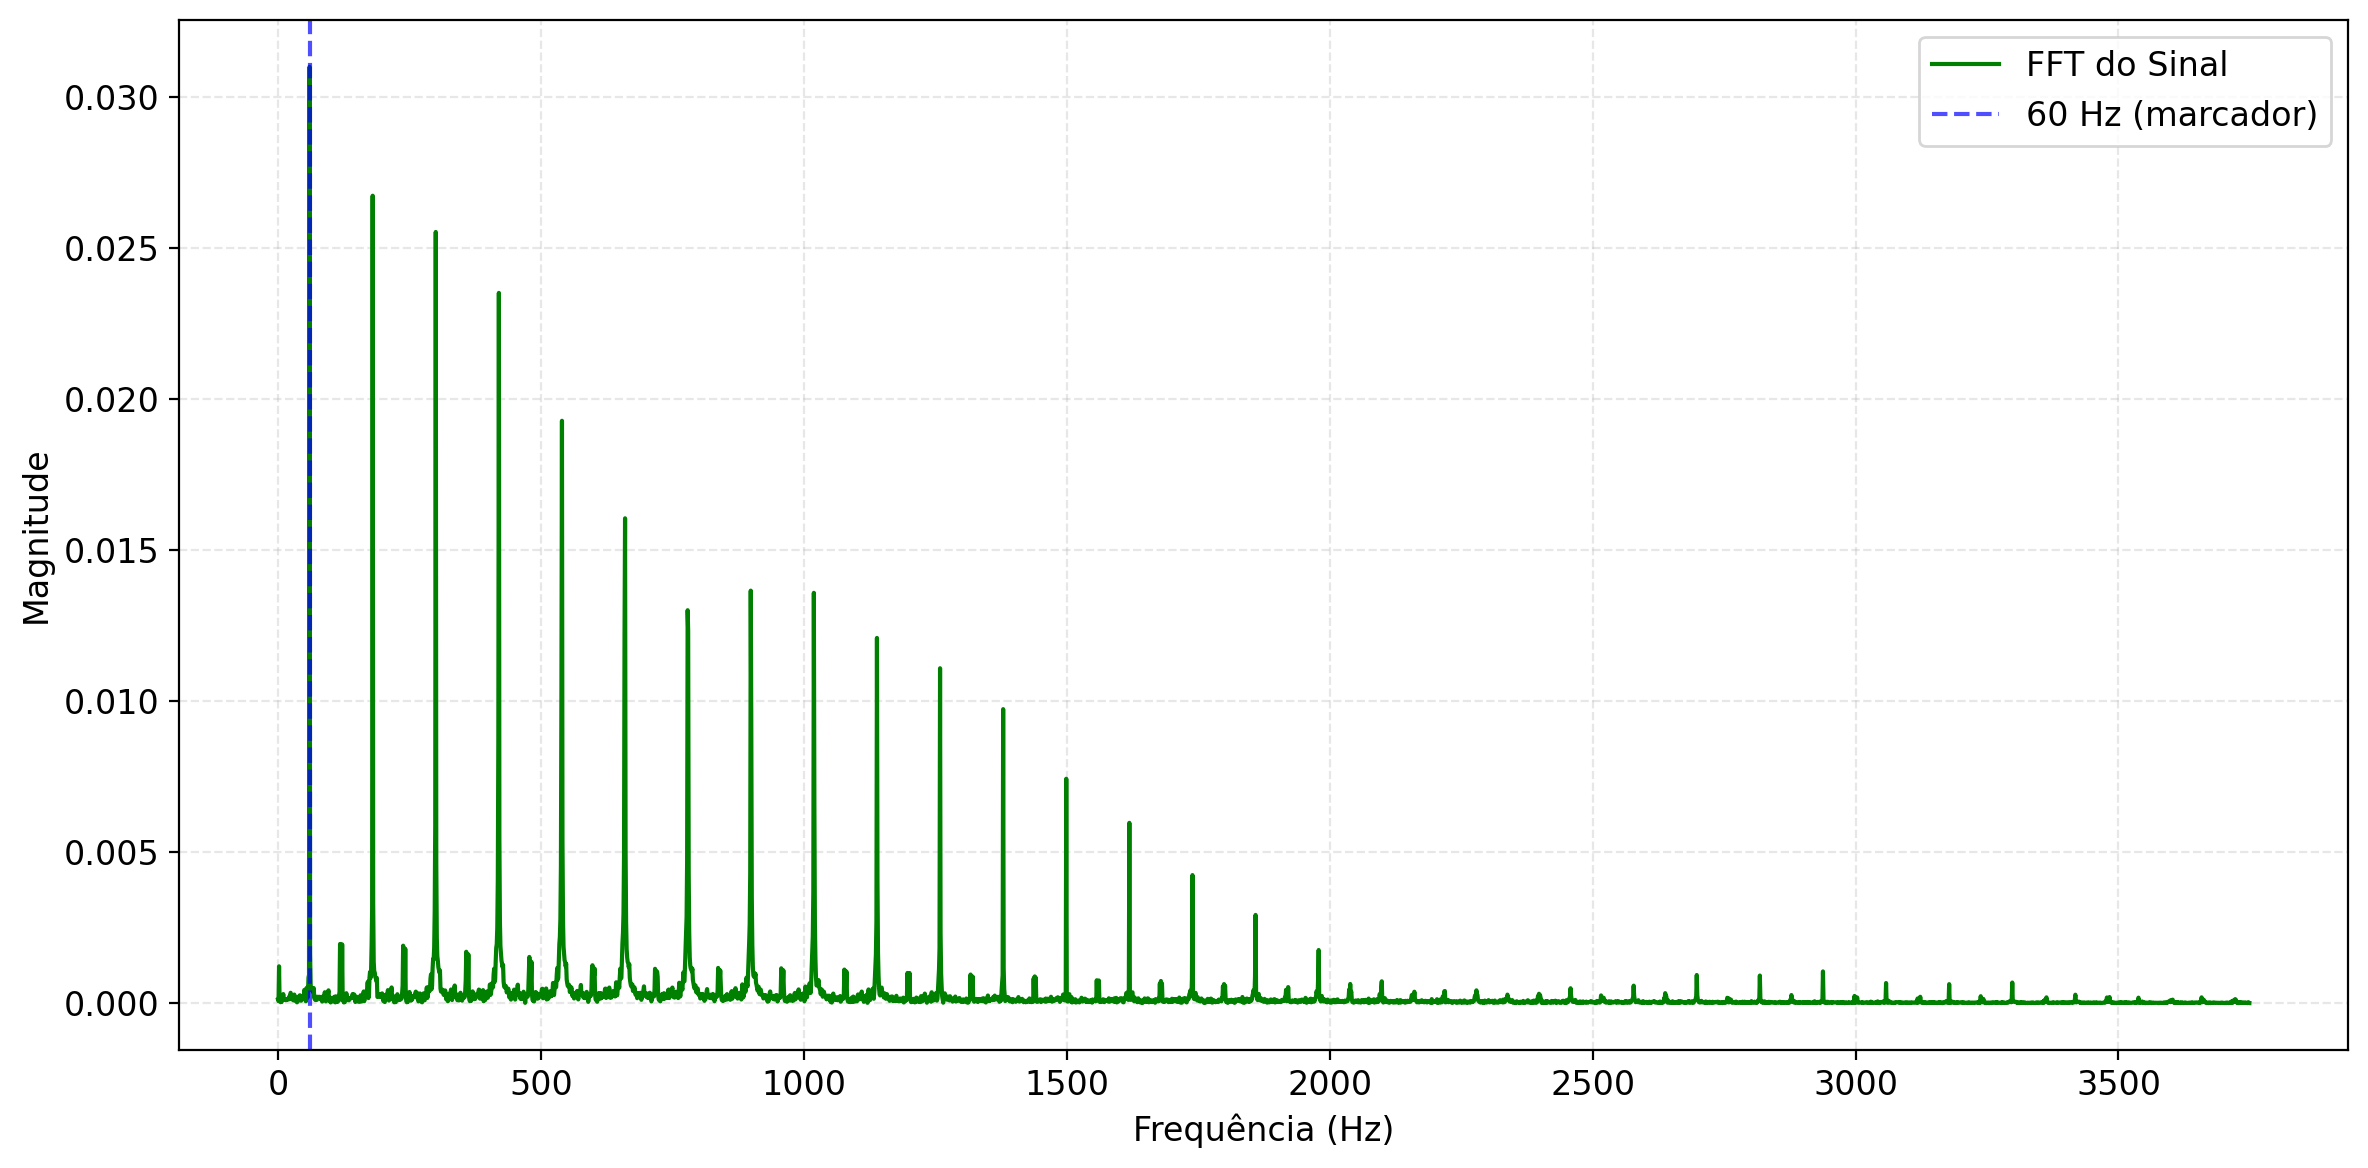

Frequência fundamental detectada: 60.00 Hz


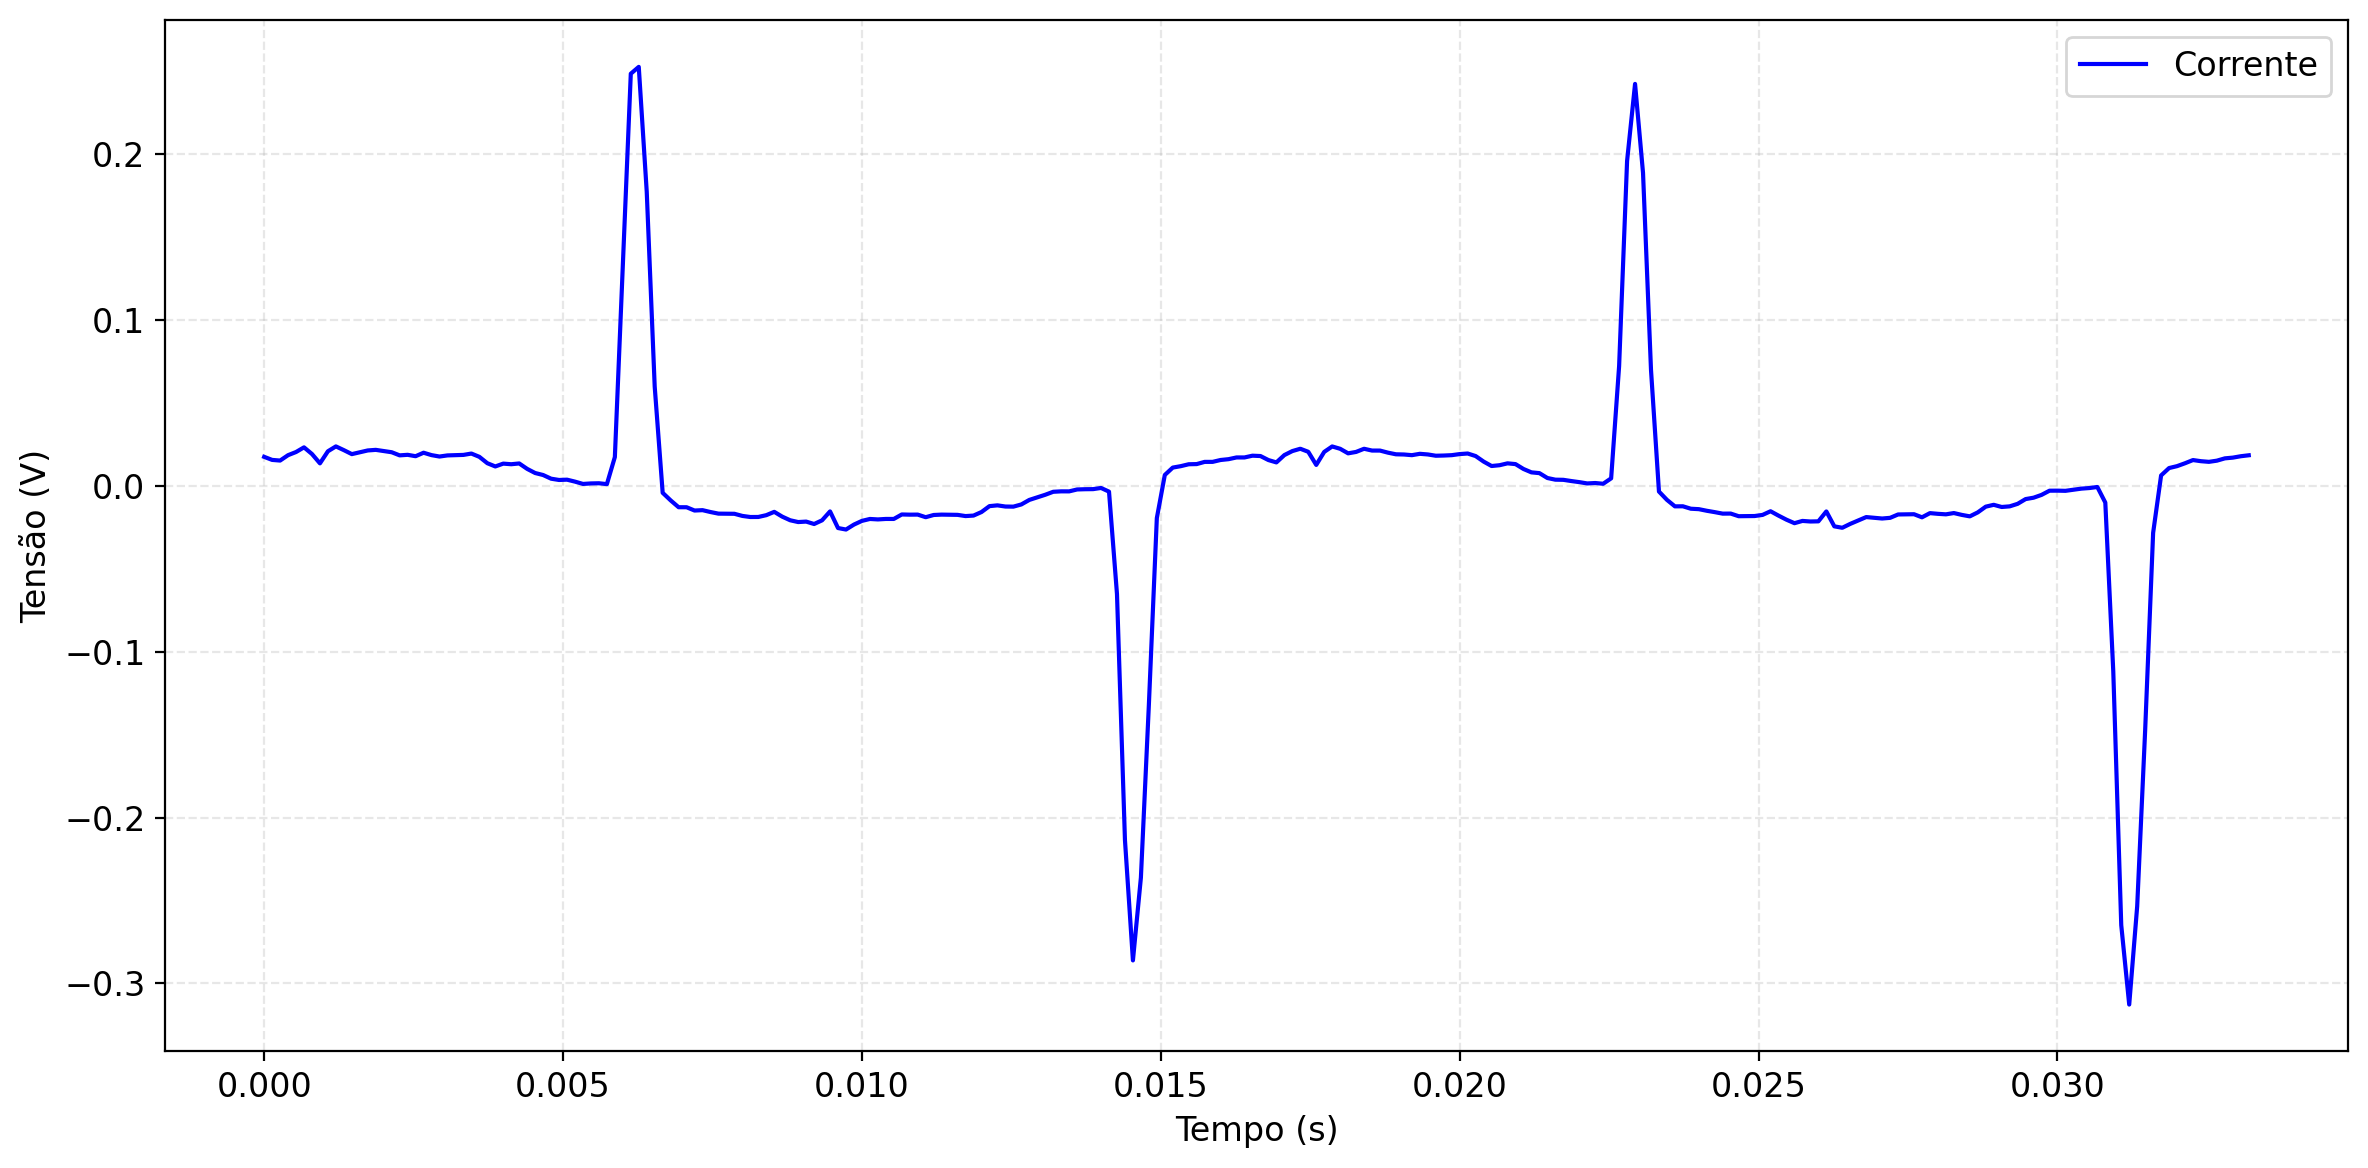

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# --- CONFIGURAÇÃO GLOBAL PARA ALTA QUALIDADE DE PLOTAGEM ---
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12

# --- 1. CARREGAMENTO E LIMPEZA DOS DADOS ---
caminho_arquivo = "/content/dados_tempo.csv"
try:
    df = pd.read_csv(caminho_arquivo, delimiter=",", skiprows=1, names=["Tempo (s)", "Corrente (A)"])
except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo}' não foi encontrado.")
    exit()

df["Tempo (s)"] = pd.to_numeric(df["Tempo (s)"], errors="coerce")
df["Corrente (A)"] = pd.to_numeric(df["Corrente (A)"], errors="coerce")
df = df.dropna().sort_values(by="Tempo (s)")

# --- 2. PREPARAÇÃO PARA ANÁLISE ---
t = df["Tempo (s)"].values
y = df["Corrente (A)"].values

if len(y) < 2:
    print("Não há dados suficientes para analisar após a limpeza.")
else:
    # --- 3. CÁLCULO DOS PARÂMETROS DE AMOSTRAGEM E FFT ---
    N = len(y)
    Ts = np.mean(np.diff(t))
    fs = 1 / Ts

    yf_complex = fft(y)
    xf = fftfreq(N, Ts)

    xf_pos = xf[:N // 2]
    yf_mag = 2.0 / N * np.abs(yf_complex[:N // 2])

    # --- 4. DETECÇÃO DA FREQUÊNCIA FUNDAMENTAL ---
    if len(yf_mag) > 1:
        indice_pico = np.argmax(yf_mag[1:]) + 1
        freq_fund = xf_pos[indice_pico]
    else:
        freq_fund = 0

    # --- 5. PLOTAGEM EM FIGURAS SEPARADAS DE ALTA QUALIDADE ---

    # Gráfico 1: Sinal Original no Domínio do Tempo
    plt.figure(figsize=(12, 6), dpi=200)
    plt.plot(t, y, label="Sinal", color="blue", linewidth=1.5)
    plt.title("Sinal Original no Domínio do Tempo")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Corrente (A)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Gráfico 2: Espectro de Frequência (FFT)
    plt.figure(figsize=(12, 6), dpi=200)
    plt.plot(xf_pos, yf_mag, label="FFT do Sinal", color="green", linewidth=1.5)
    plt.axvline(x=60, color='blue', linestyle='--', alpha=0.69, label='60 Hz (marcador)')
    plt.title("")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Gráfico 3: Zoom em 2 Períodos
    if freq_fund > 0:
        print(f"Frequência fundamental detectada: {freq_fund:.2f} Hz")

        amostras_zoom = int(round(2 * fs / freq_fund))
        if amostras_zoom > N:
            amostras_zoom = N

        plt.figure(figsize=(12, 6), dpi=200)
        plt.plot(t[:amostras_zoom], y[:amostras_zoom], label="Corrente", color="blue", linewidth=1.5)
        plt.title(f"")
        plt.xlabel("Tempo (s)")
        plt.ylabel("Tensão (V)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("Não foi possível detectar uma frequência fundamental válida para o zoom.")
        plt.figure(figsize=(12, 3), dpi=200)
        plt.text(0.5, 0.5, 'Zoom não aplicável (frequência fundamental não detectada)',
                 ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)
        plt.axis('off')
        plt.tight_layout()
        plt.show()


# **Lâmpada de Aquecimeto - Osciloscópio**

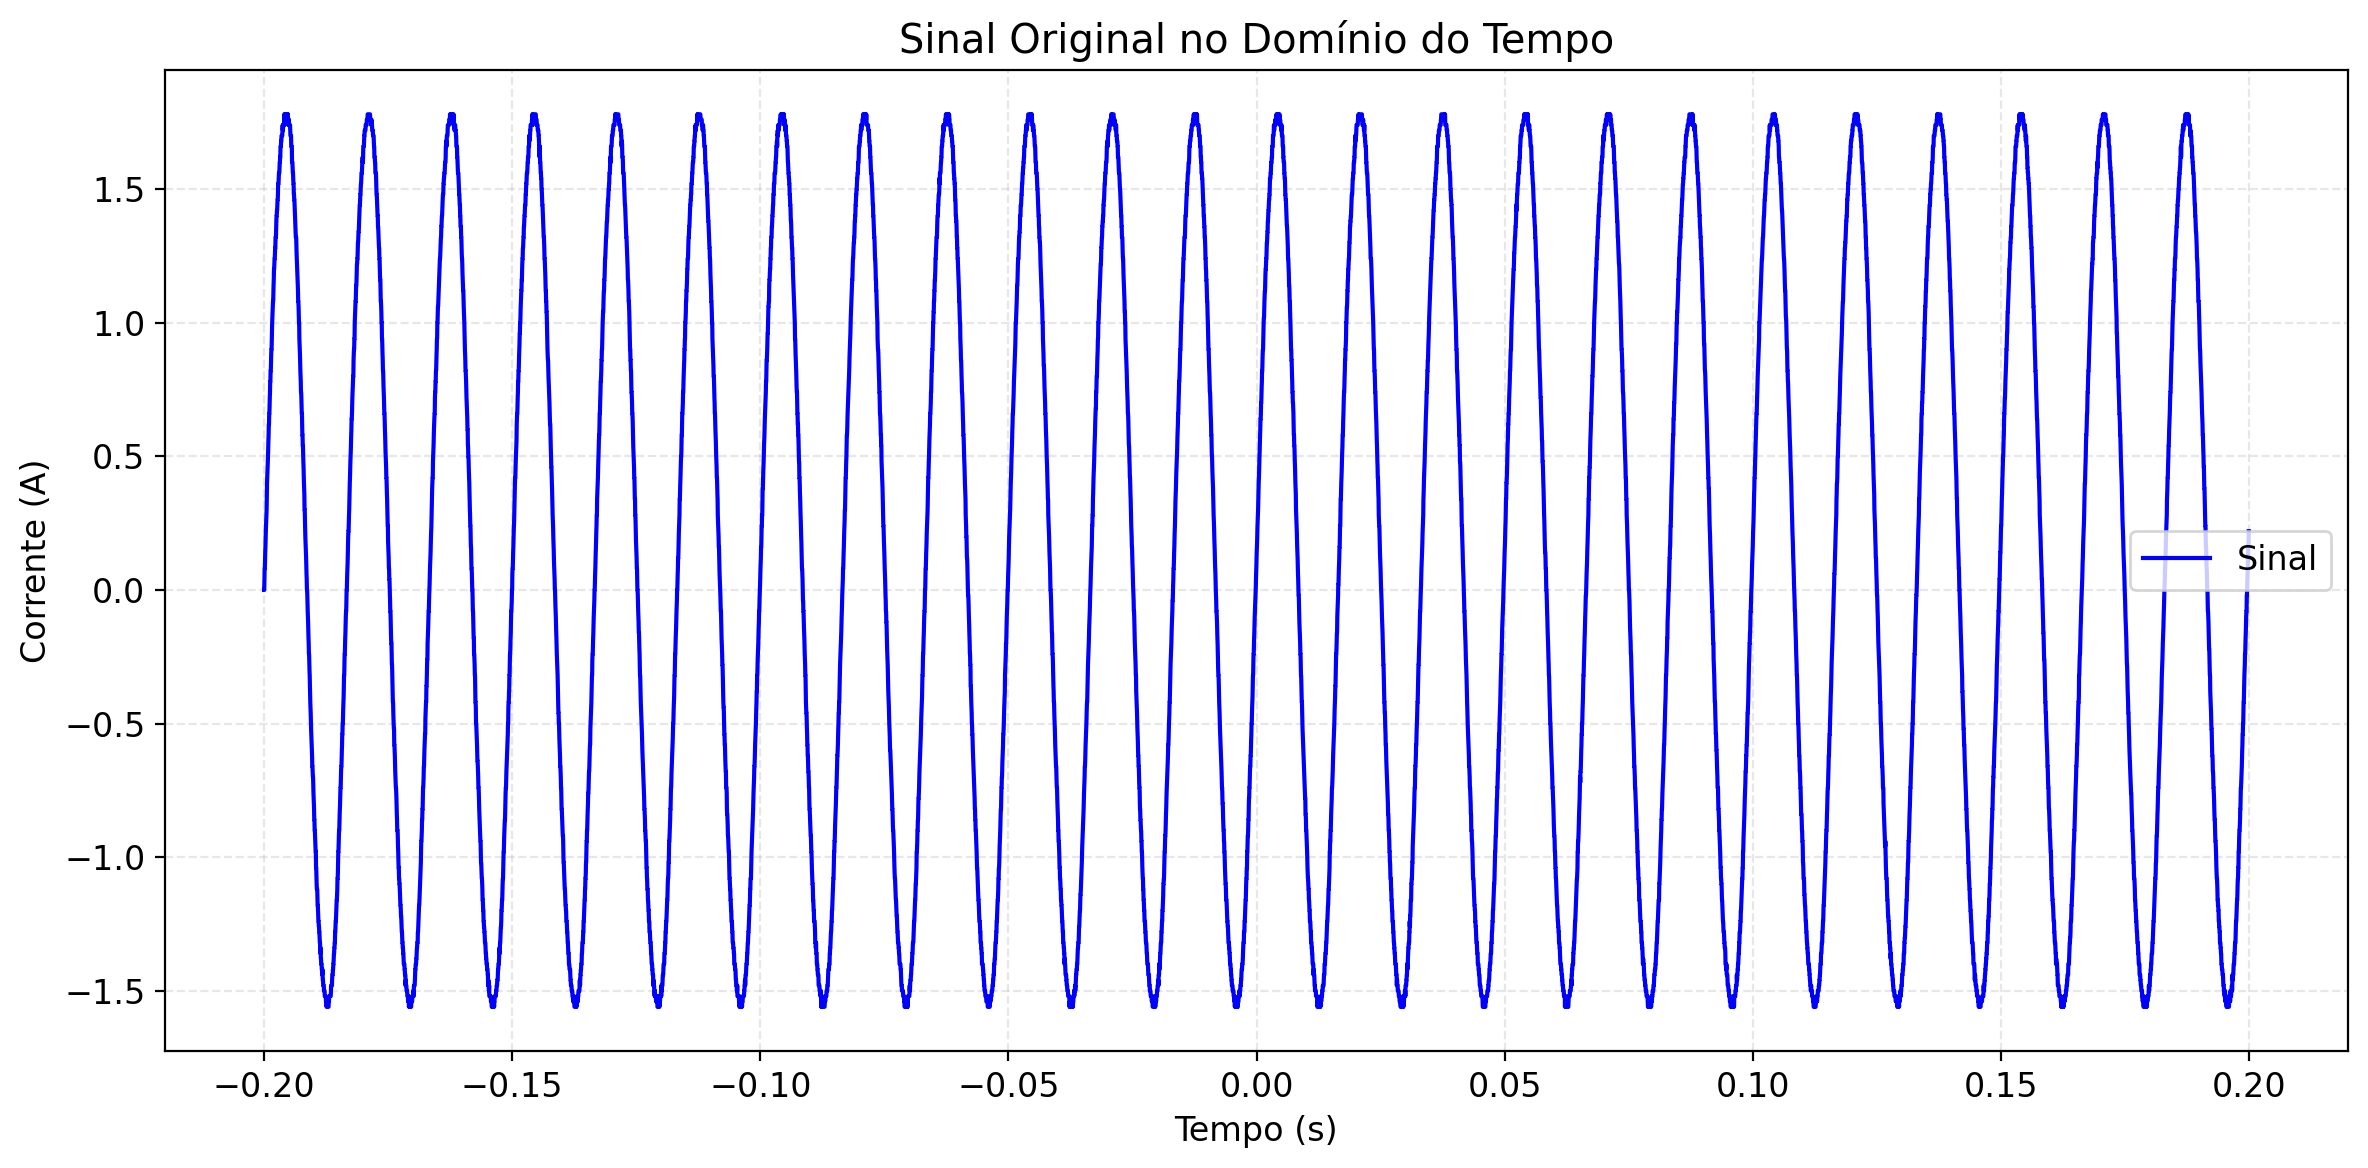

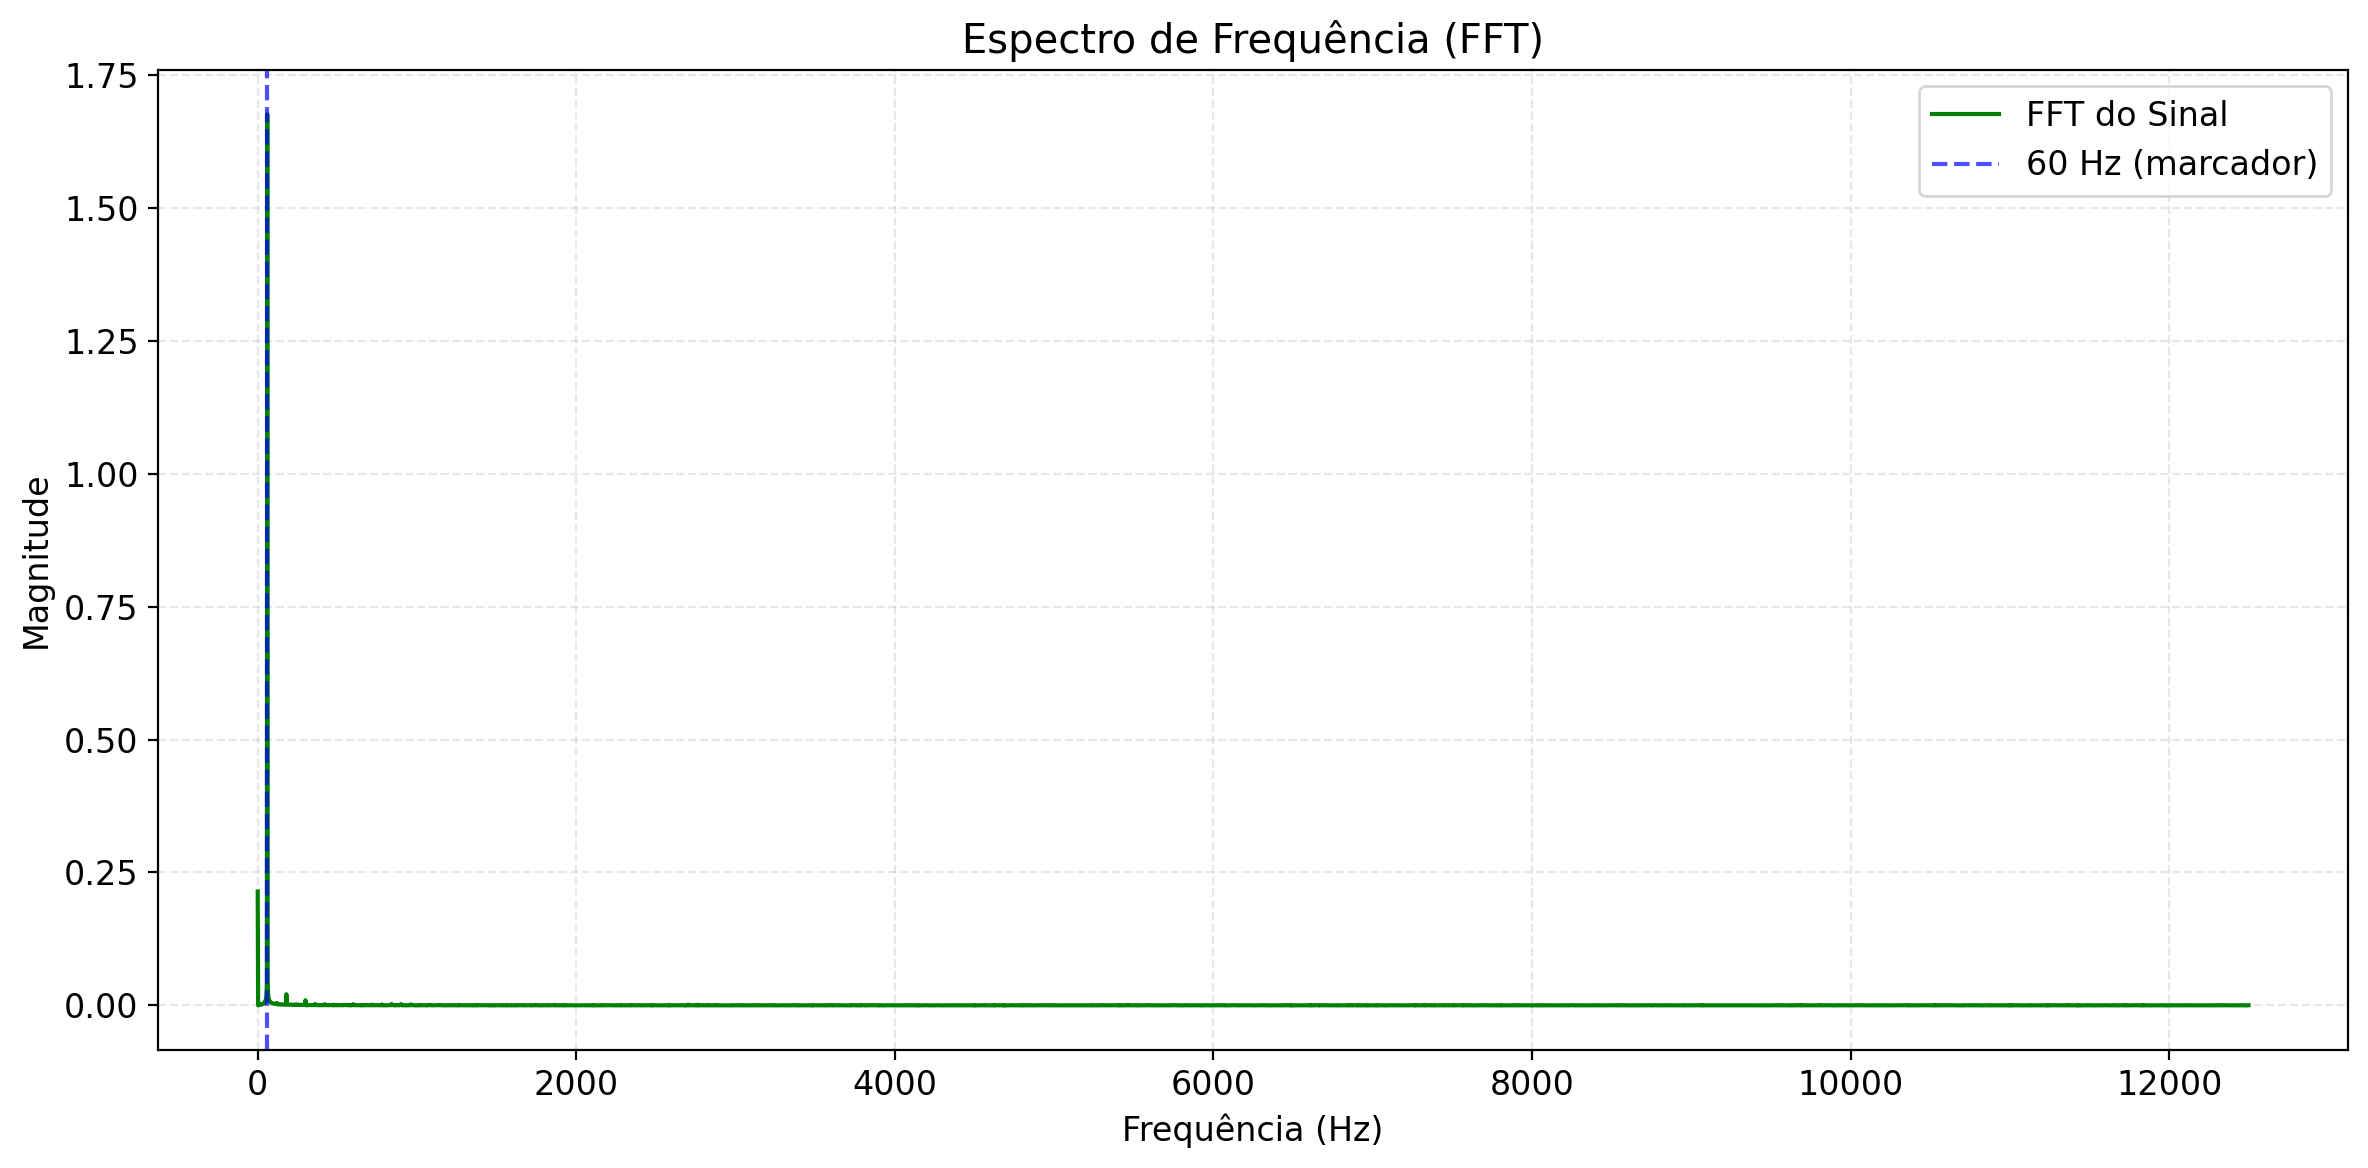

Frequência fundamental detectada: 60.00 Hz


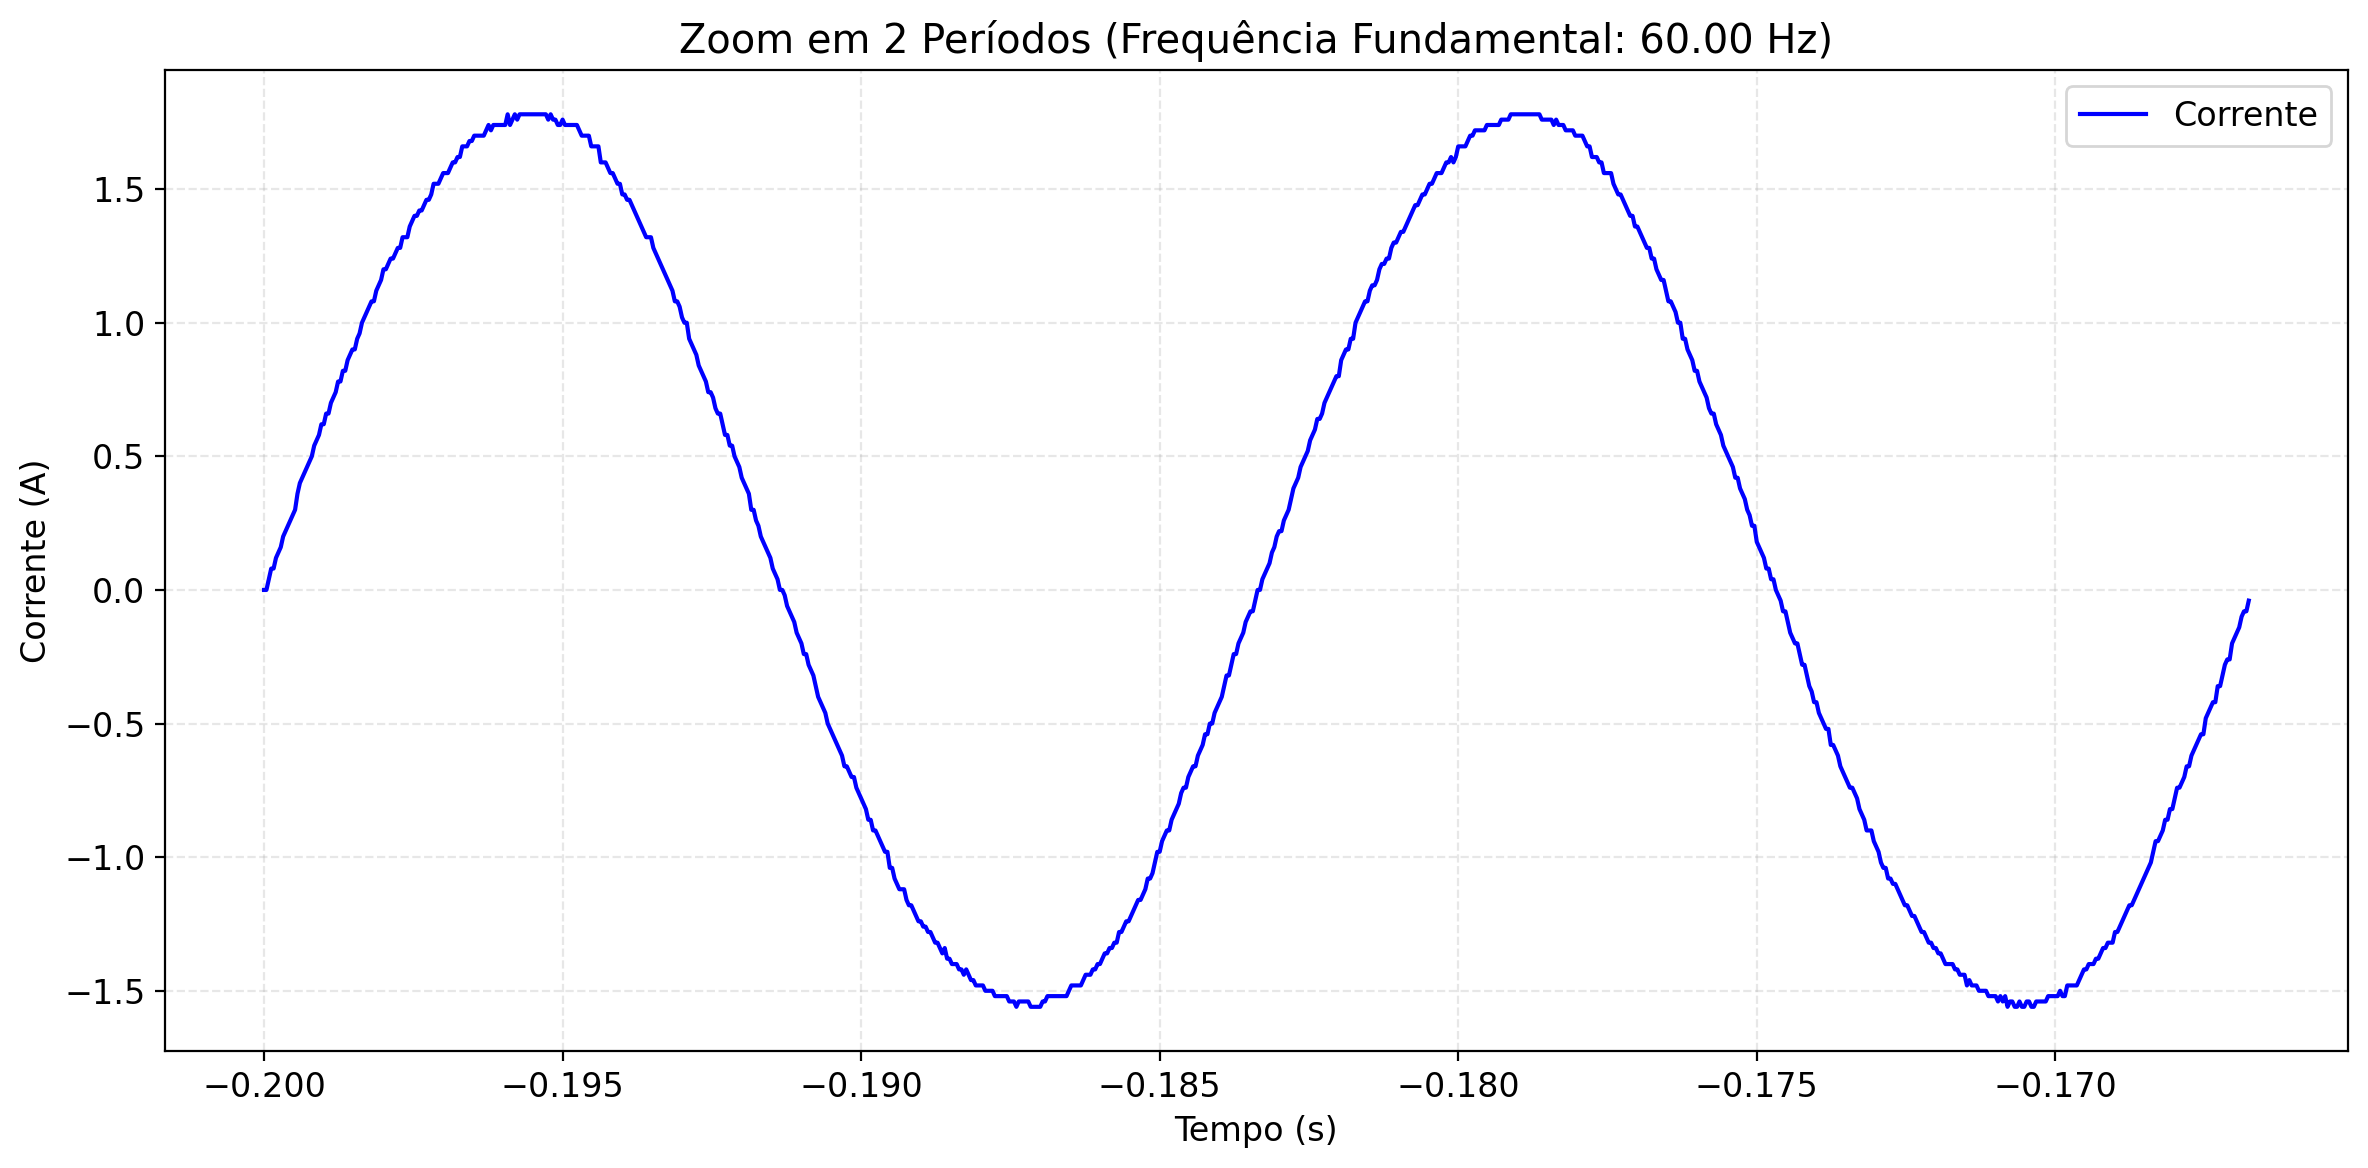

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# --- CONFIGURAÇÃO GLOBAL PARA ALTA QUALIDADE DE PLOTAGEM ---
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12

# --- 1. CARREGAMENTO E LIMPEZA DOS DADOS ---
caminho_arquivo = "/content/LAMP.CSV"
try:
    df = pd.read_csv(caminho_arquivo, delimiter=",", skiprows=1, names=["Tempo (s)", "Corrente (A)"])
except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo}' não foi encontrado.")
    exit()

df["Tempo (s)"] = pd.to_numeric(df["Tempo (s)"], errors="coerce")
df["Corrente (A)"] = pd.to_numeric(df["Corrente (A)"], errors="coerce")
df = df.dropna().sort_values(by="Tempo (s)")

# --- 2. PREPARAÇÃO PARA ANÁLISE ---
t = df["Tempo (s)"].values
y = df["Corrente (A)"].values

if len(y) < 2:
    print("Não há dados suficientes para analisar após a limpeza.")
else:
    # --- 3. CÁLCULO DOS PARÂMETROS DE AMOSTRAGEM E FFT ---
    N = len(y)
    Ts = np.mean(np.diff(t))
    fs = 1 / Ts

    yf_complex = fft(y)
    xf = fftfreq(N, Ts)

    xf_pos = xf[:N // 2]
    yf_mag = 2.0 / N * np.abs(yf_complex[:N // 2])

    # --- 4. DETECÇÃO DA FREQUÊNCIA FUNDAMENTAL ---
    if len(yf_mag) > 1:
        indice_pico = np.argmax(yf_mag[1:]) + 1
        freq_fund = xf_pos[indice_pico]
    else:
        freq_fund = 0

    # --- 5. PLOTAGEM EM FIGURAS SEPARADAS DE ALTA QUALIDADE ---

    # Gráfico 1: Sinal Original no Domínio do Tempo
    plt.figure(figsize=(12, 6), dpi=200)
    plt.plot(t, y, label="Sinal", color="blue", linewidth=1.5)
    plt.title("Sinal Original no Domínio do Tempo")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Corrente (A)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Gráfico 2: Espectro de Frequência (FFT)
    plt.figure(figsize=(12, 6), dpi=200)
    plt.plot(xf_pos, yf_mag, label="FFT do Sinal", color="green", linewidth=1.5)
    plt.axvline(x=60, color='blue', linestyle='--', alpha=0.69, label='60 Hz (marcador)')
    plt.title("Espectro de Frequência (FFT)")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Gráfico 3: Zoom em 2 Períodos
    if freq_fund > 0:
        print(f"Frequência fundamental detectada: {freq_fund:.2f} Hz")

        amostras_zoom = int(round(2 * fs / freq_fund))
        if amostras_zoom > N:
            amostras_zoom = N

        plt.figure(figsize=(12, 6), dpi=200)
        plt.plot(t[:amostras_zoom], y[:amostras_zoom], label="Corrente", color="blue", linewidth=1.5)
        plt.title(f"Zoom em 2 Períodos (Frequência Fundamental: {freq_fund:.2f} Hz)")
        plt.xlabel("Tempo (s)")
        plt.ylabel("Corrente (A)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("Não foi possível detectar uma frequência fundamental válida para o zoom.")
        plt.figure(figsize=(12, 3), dpi=200)
        plt.text(0.5, 0.5, 'Zoom não aplicável (frequência fundamental não detectada)',
                 ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)
        plt.axis('off')
        plt.tight_layout()
        plt.show()


# **Lâmpada de Aquecimeto - Sistema Proposto**

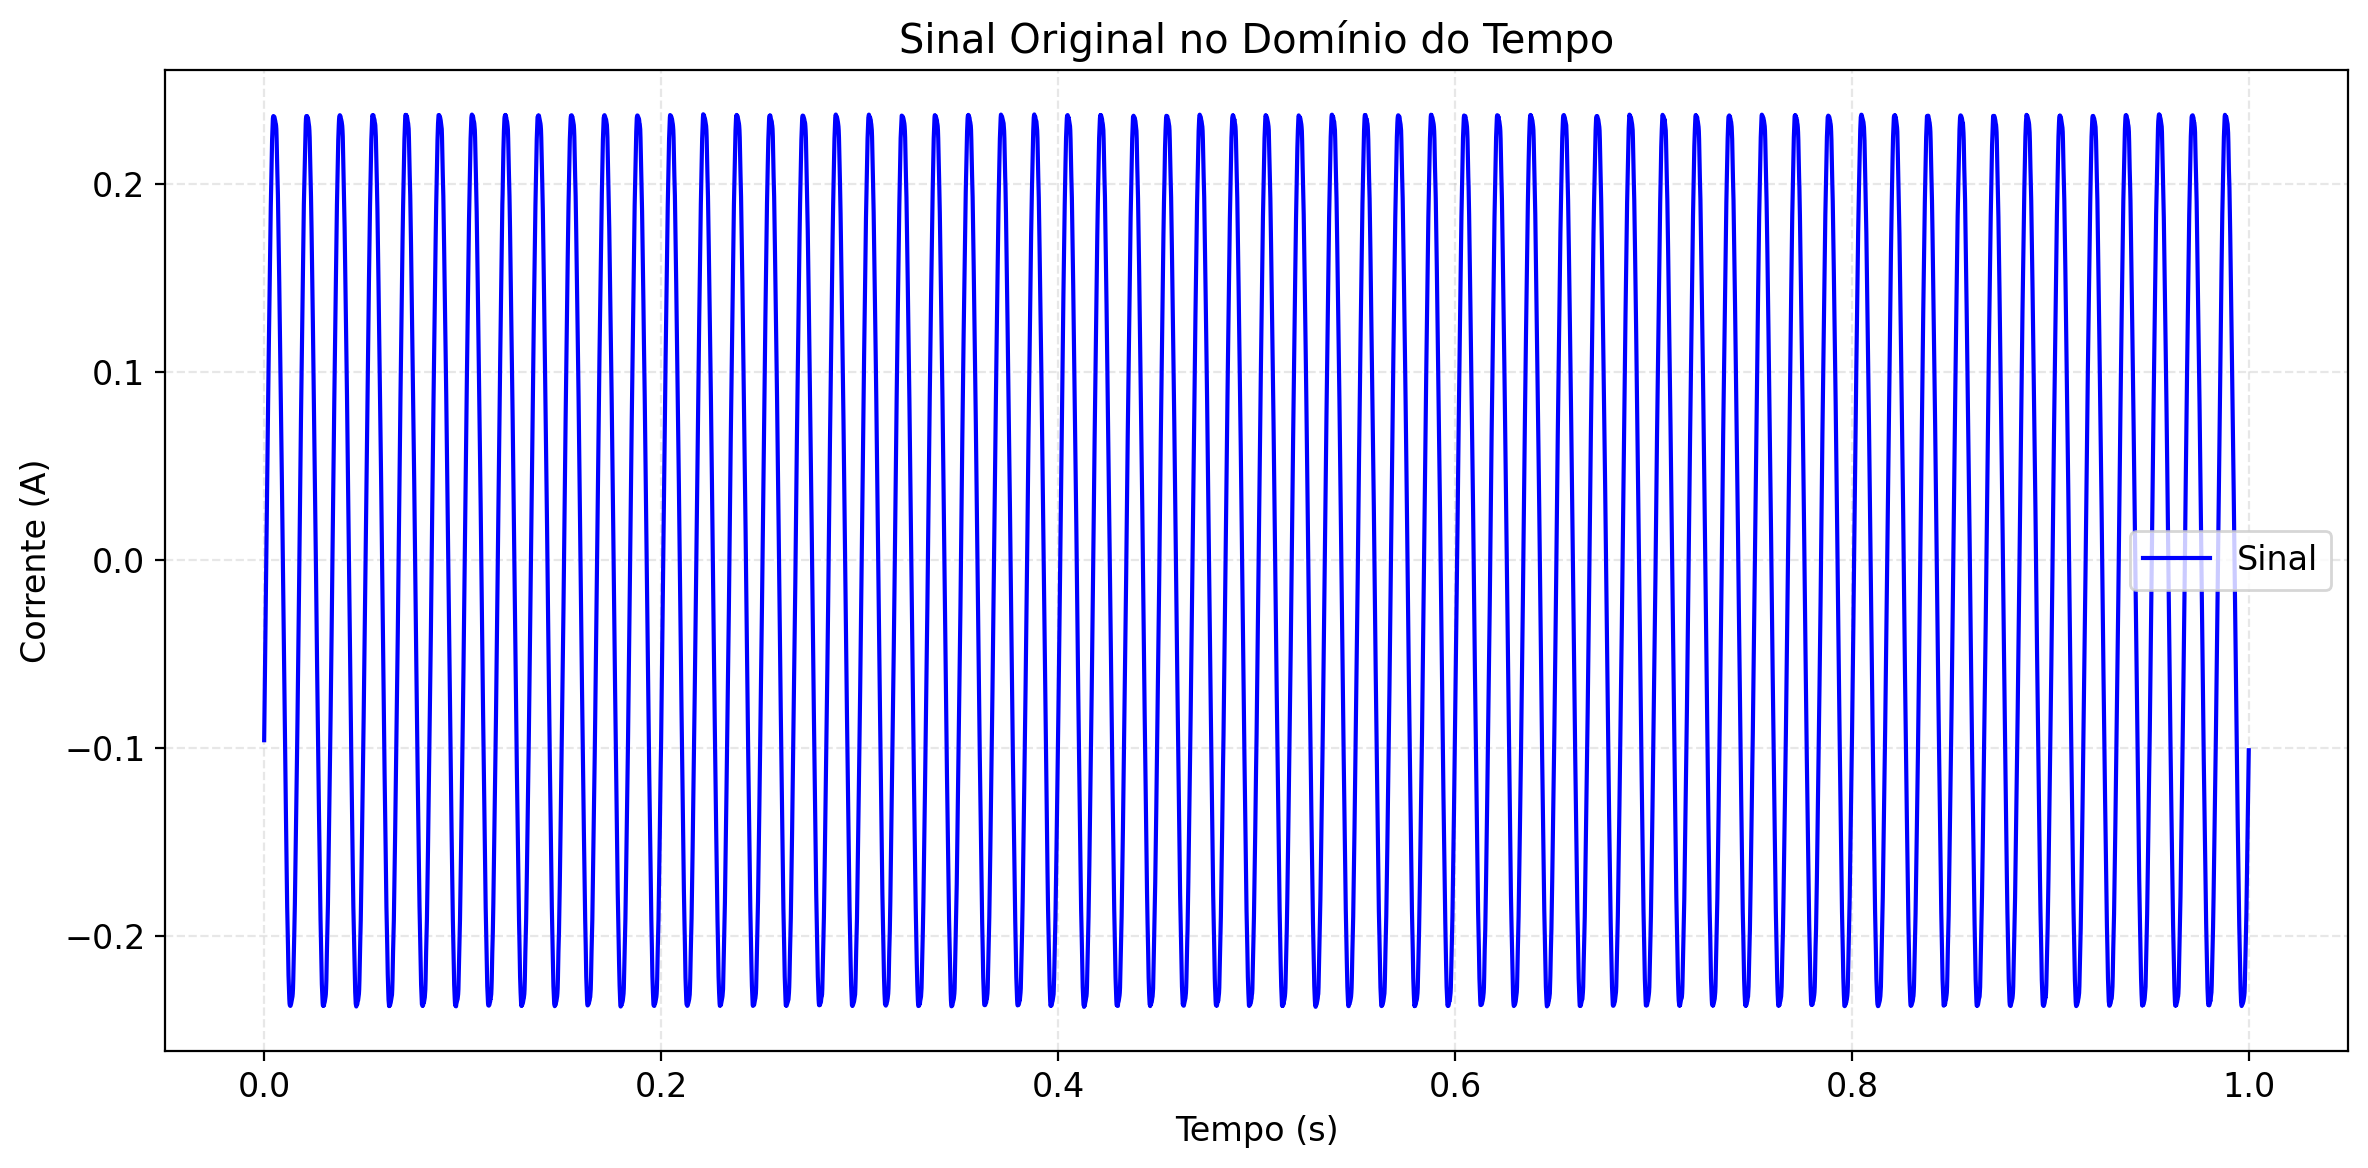

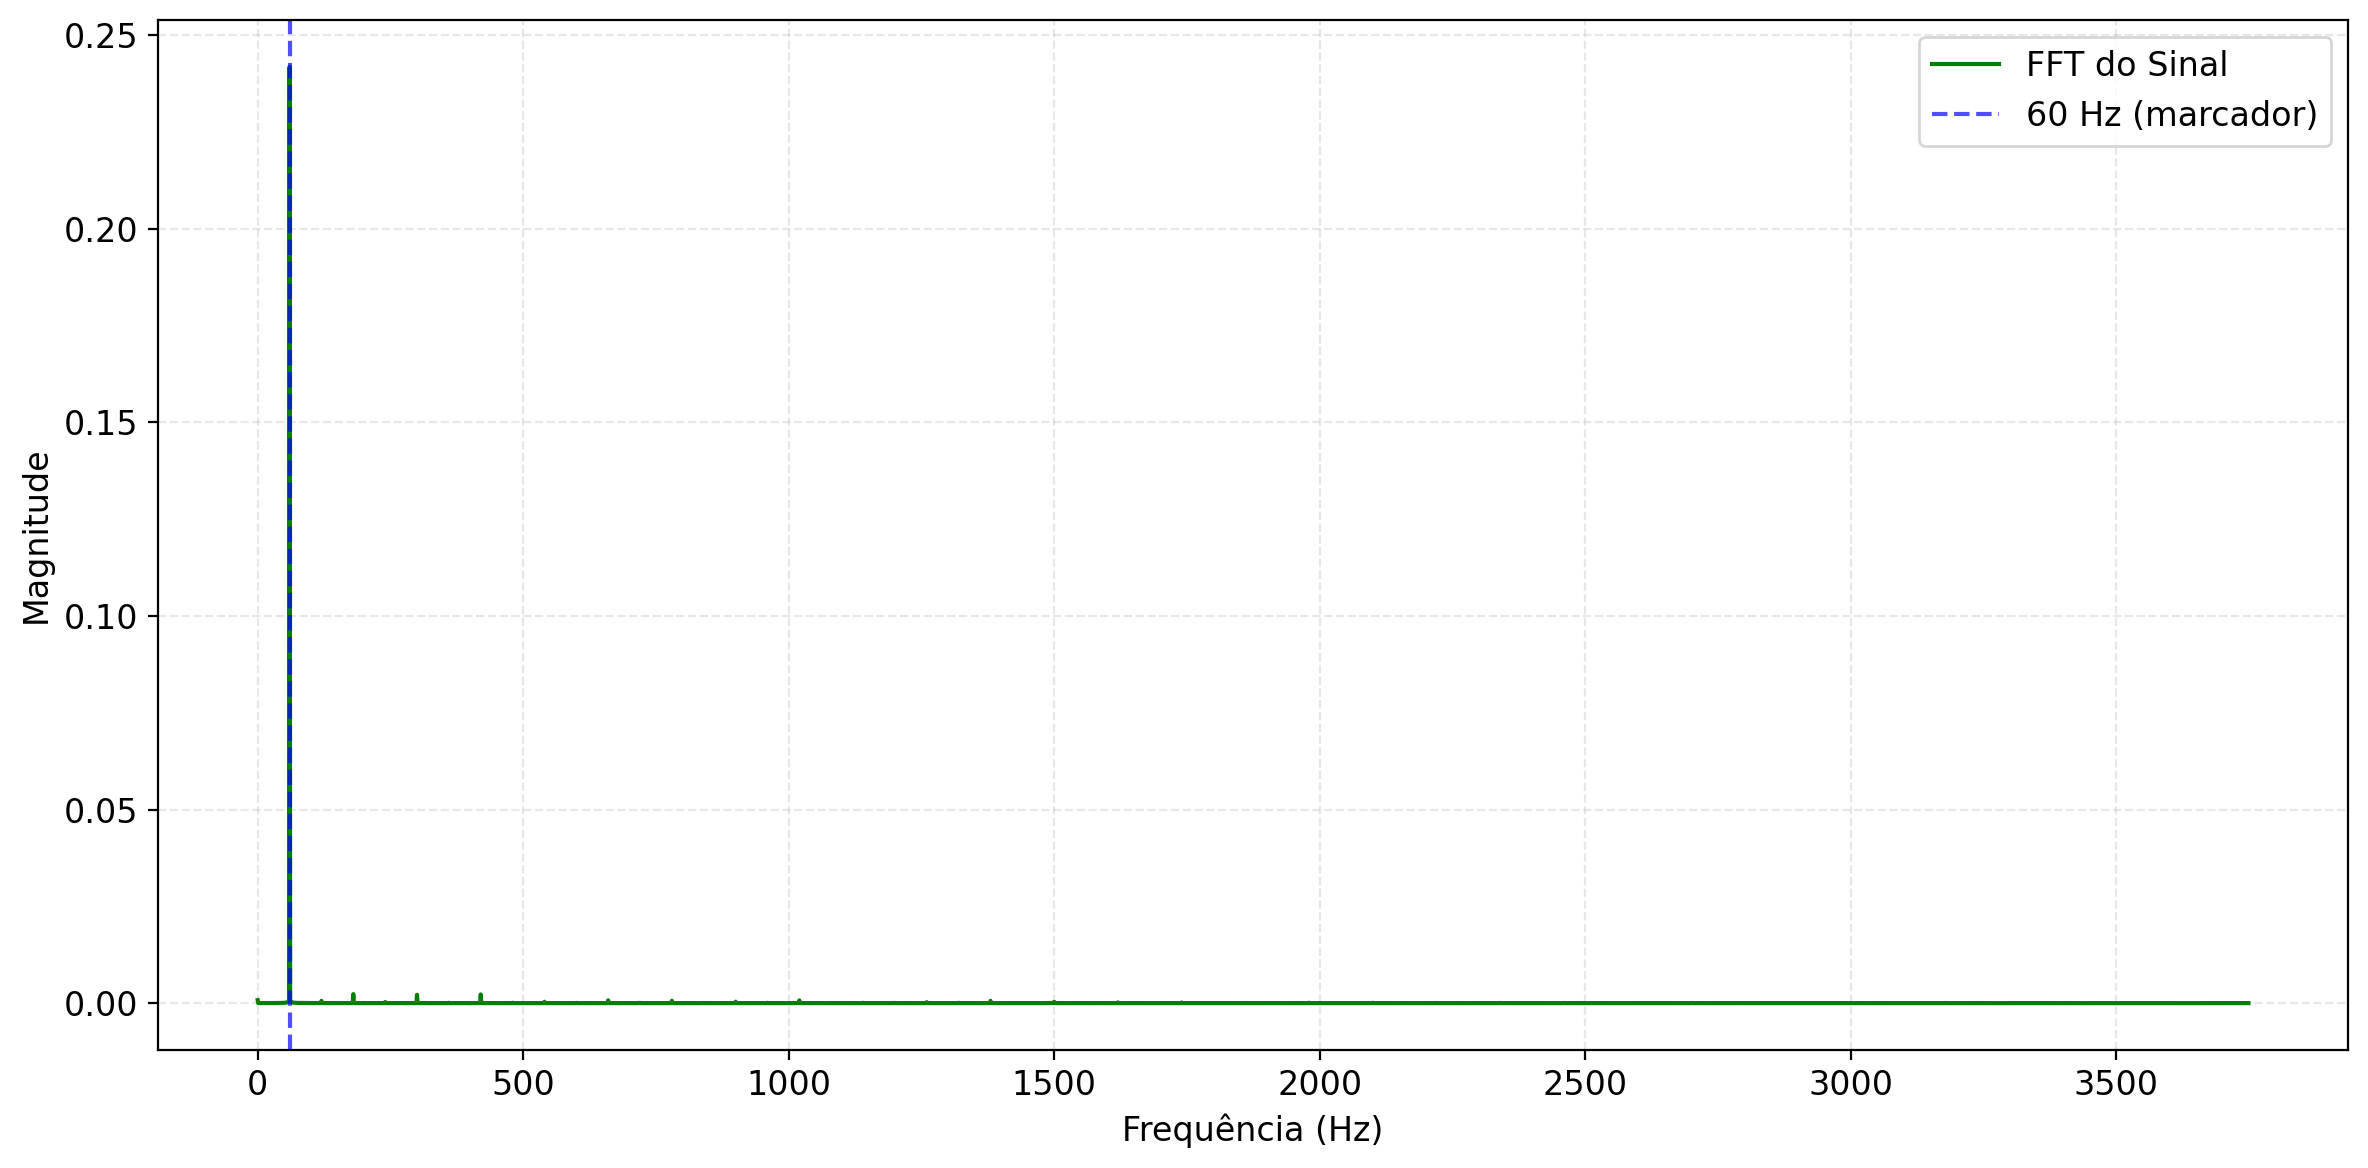

Frequência fundamental detectada: 60.00 Hz


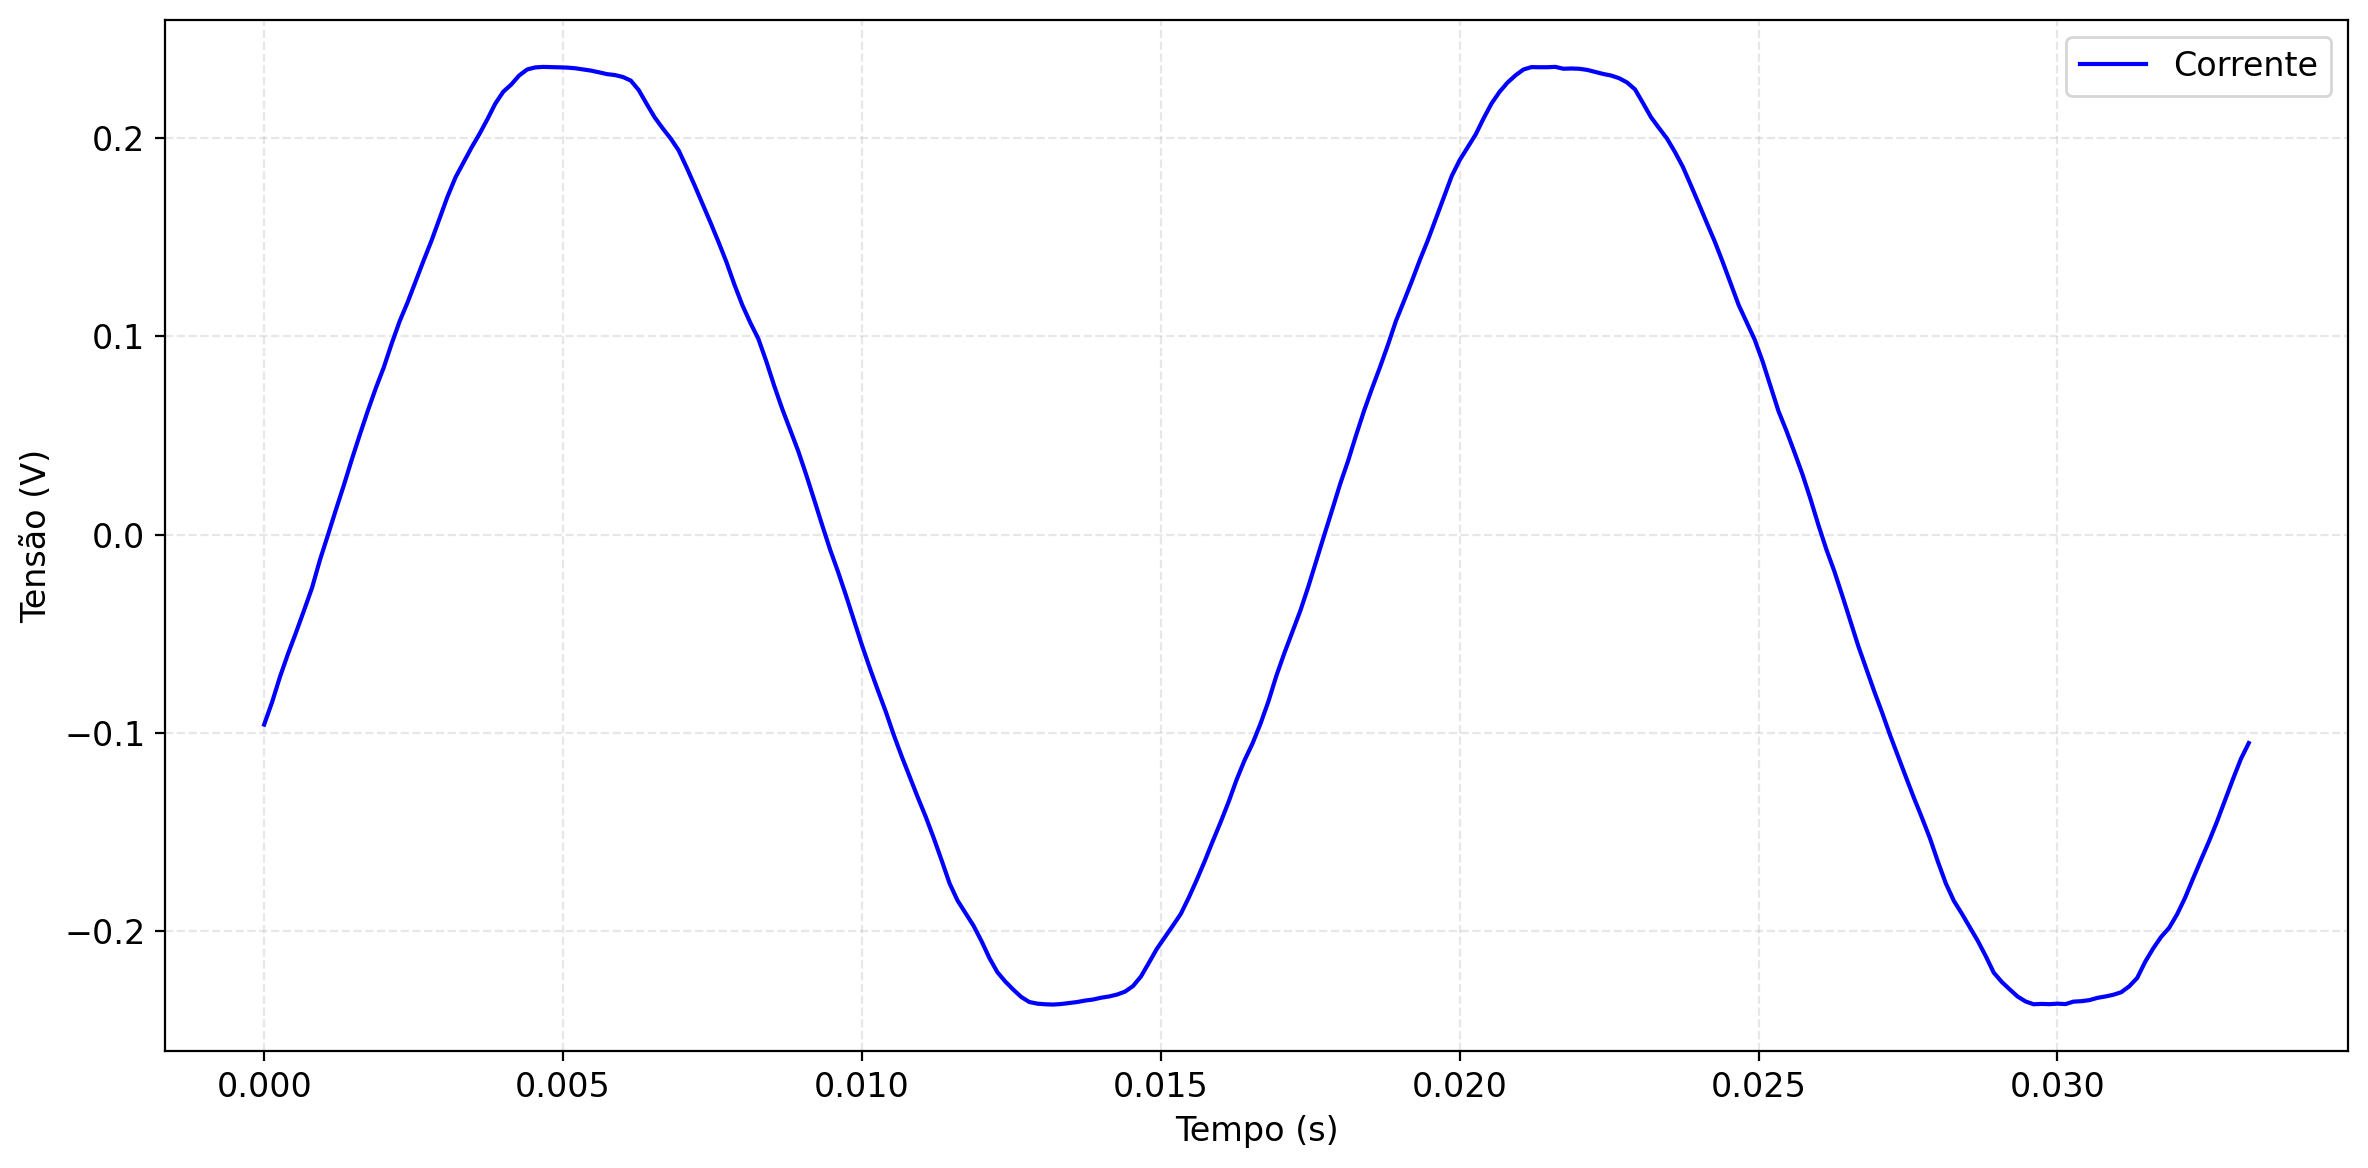

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# --- CONFIGURAÇÃO GLOBAL PARA ALTA QUALIDADE DE PLOTAGEM ---
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12

# --- 1. CARREGAMENTO E LIMPEZA DOS DADOS ---
caminho_arquivo = "/content/dados_tempo_lamp.csv"
try:
    df = pd.read_csv(caminho_arquivo, delimiter=",", skiprows=1, names=["Tempo (s)", "Corrente (A)"])
except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo}' não foi encontrado.")
    exit()

df["Tempo (s)"] = pd.to_numeric(df["Tempo (s)"], errors="coerce")
df["Corrente (A)"] = pd.to_numeric(df["Corrente (A)"], errors="coerce")
df = df.dropna().sort_values(by="Tempo (s)")

# --- 2. PREPARAÇÃO PARA ANÁLISE ---
t = df["Tempo (s)"].values
y = df["Corrente (A)"].values

if len(y) < 2:
    print("Não há dados suficientes para analisar após a limpeza.")
else:
    # --- 3. CÁLCULO DOS PARÂMETROS DE AMOSTRAGEM E FFT ---
    N = len(y)
    Ts = np.mean(np.diff(t))
    fs = 1 / Ts

    yf_complex = fft(y)
    xf = fftfreq(N, Ts)

    xf_pos = xf[:N // 2]
    yf_mag = 2.0 / N * np.abs(yf_complex[:N // 2])

    # --- 4. DETECÇÃO DA FREQUÊNCIA FUNDAMENTAL ---
    if len(yf_mag) > 1:
        indice_pico = np.argmax(yf_mag[1:]) + 1
        freq_fund = xf_pos[indice_pico]
    else:
        freq_fund = 0

    # --- 5. PLOTAGEM EM FIGURAS SEPARADAS DE ALTA QUALIDADE ---

    # Gráfico 1: Sinal Original no Domínio do Tempo
    plt.figure(figsize=(12, 6), dpi=200)
    plt.plot(t, y, label="Sinal", color="blue", linewidth=1.5)
    plt.title("Sinal Original no Domínio do Tempo")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Corrente (A)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Gráfico 2: Espectro de Frequência (FFT)
    plt.figure(figsize=(12, 6), dpi=200)
    plt.plot(xf_pos, yf_mag, label="FFT do Sinal", color="green", linewidth=1.5)
    plt.axvline(x=60, color='blue', linestyle='--', alpha=0.69, label='60 Hz (marcador)')
    plt.title("")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Gráfico 3: Zoom em 2 Períodos
    if freq_fund > 0:
        print(f"Frequência fundamental detectada: {freq_fund:.2f} Hz")

        amostras_zoom = int(round(2 * fs / freq_fund))
        if amostras_zoom > N:
            amostras_zoom = N

        plt.figure(figsize=(12, 6), dpi=200)
        plt.plot(t[:amostras_zoom], y[:amostras_zoom], label="Corrente", color="blue", linewidth=1.5)
        plt.title(f"")
        plt.xlabel("Tempo (s)")
        plt.ylabel("Tensão (V)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("Não foi possível detectar uma frequência fundamental válida para o zoom.")
        plt.figure(figsize=(12, 3), dpi=200)
        plt.text(0.5, 0.5, 'Zoom não aplicável (frequência fundamental não detectada)',
                 ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
